<a href="https://colab.research.google.com/github/Yogs005/Bank_Marketing_Effectivenss_Predition/blob/main/Copy_of_COPY_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
bank_df=pd.read_csv('/content/drive/MyDrive/Python Data/Bank/bank-full.csv',sep=';')

In [ ]:
bank_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [ ]:
bank_df.shape

(45211, 17)

There are totally 45211 rows and 17 columns in the dataset

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Luckily we dont have any null data and dupliucated data.

In [ ]:
bank_df.duplicated().sum()

0

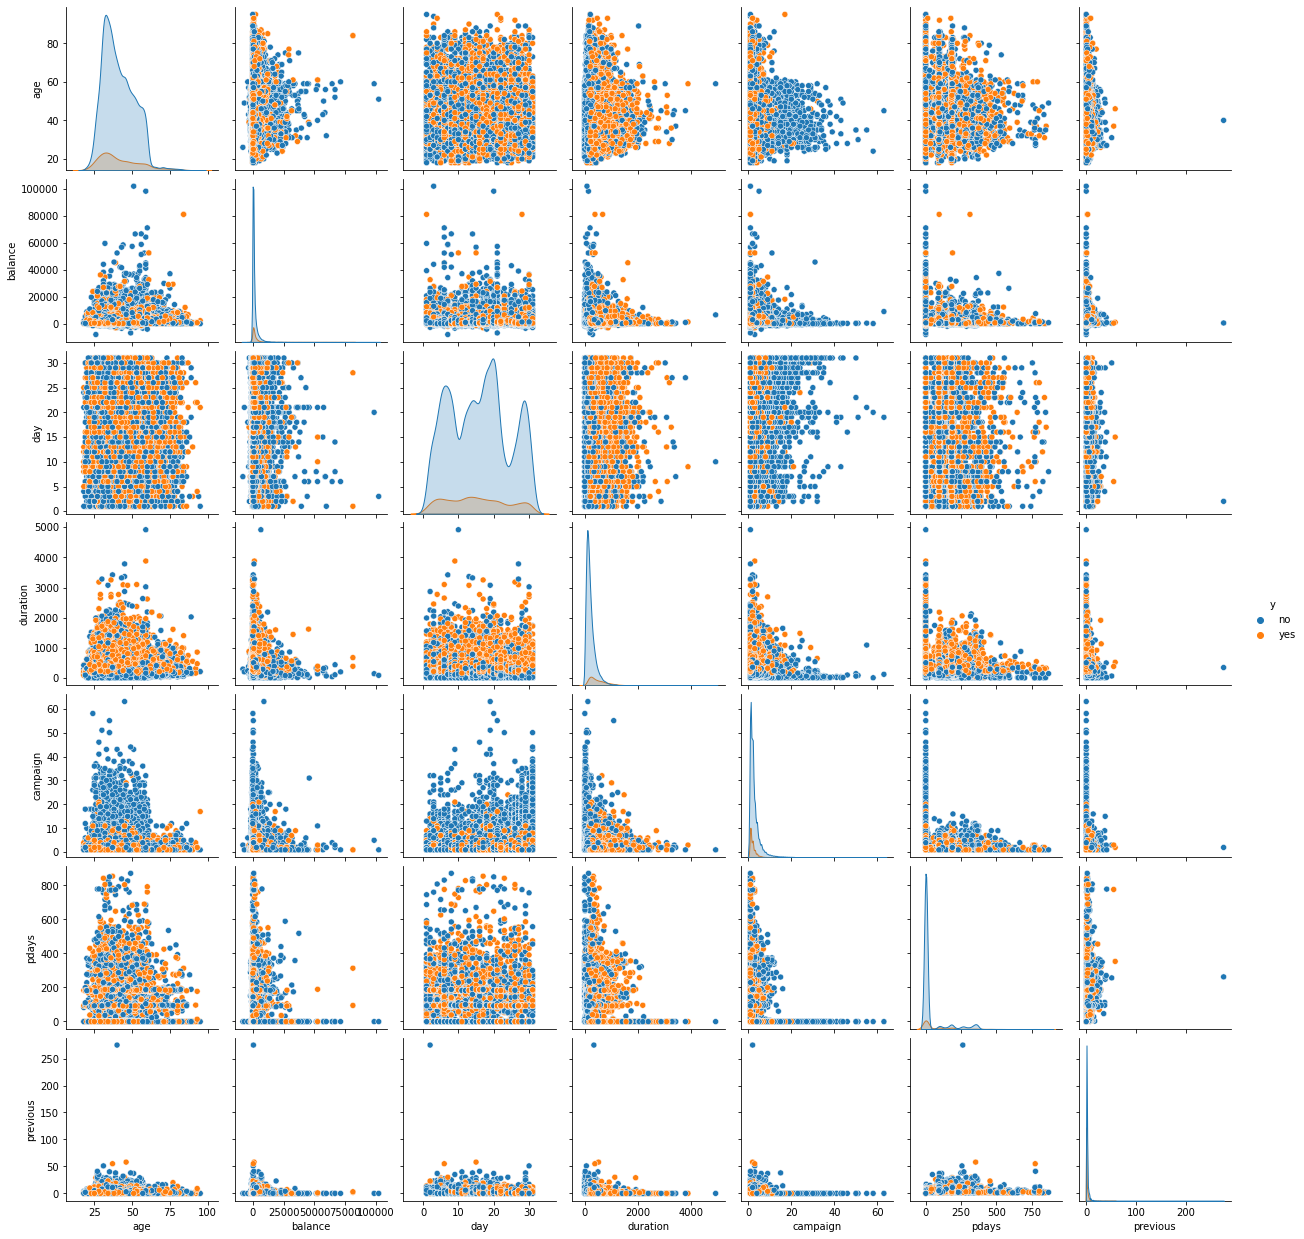

In [ ]:
#Plotting numerical features
sns.pairplot(bank_df, hue='y')

From the above pair plot we can see how all features with each other contributing the target feature.

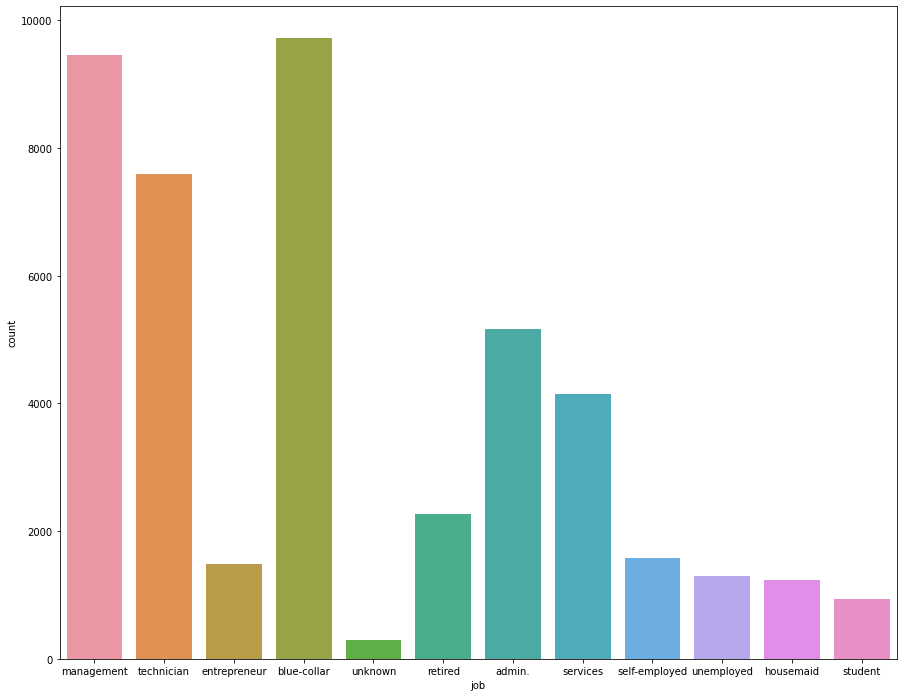

In [ ]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='job',data=bank_df)

From above count plot we can see each job and its total count.

In [ ]:
cat_features= ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

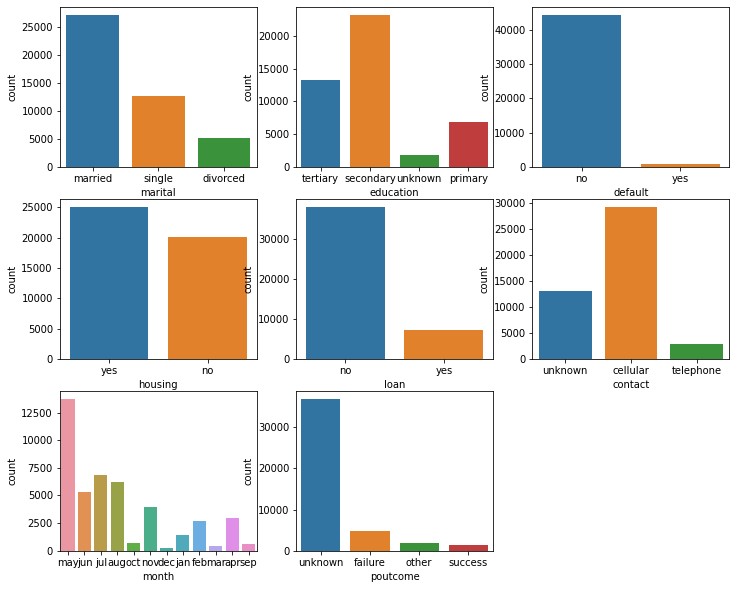

In [ ]:
fig=plt.figure(figsize=(12,10))
a=3
b=3
c=1
for i in cat_features:
  plt.subplot(a,b,c)
  sns.countplot(bank_df[i])
  c=c+1
plt.show()

We have taken out categorical features, and using count plot we have got total count for each category in the features.

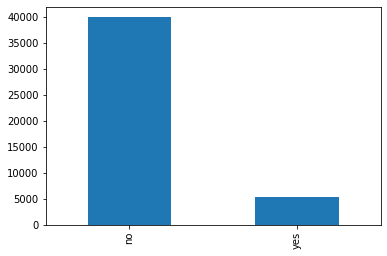

In [ ]:
count= bank_df['y'].value_counts()
count.plot.bar('Deposite value counts')

In [ ]:
def bivariate(column):
  temp=pd.DataFrame()

  temp['No_Deposit']=bank_df[bank_df['y']=='no'][column].value_counts()
  temp['Yes_Deposit']=bank_df[bank_df['y']=='yes'][column].value_counts()
  temp.plot(kind='bar')
  plt.xlabel(f'{column}')
  plt.ylabel('Number of customers')
  plt.title('{} vs Deposit'.format(column))
  plt.show()

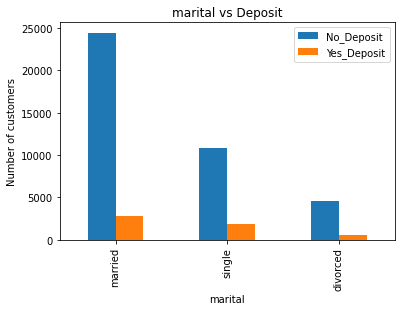

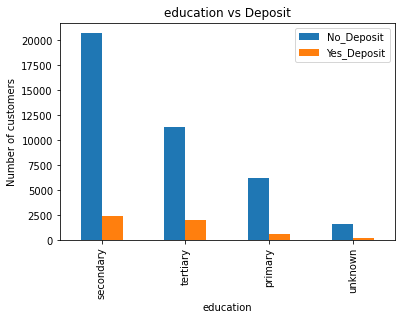

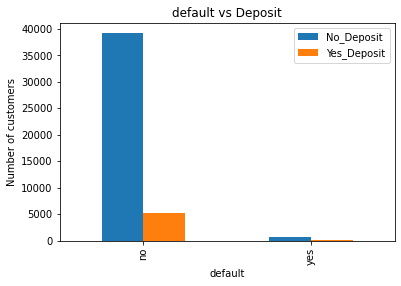

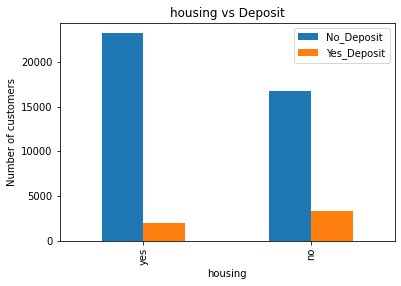

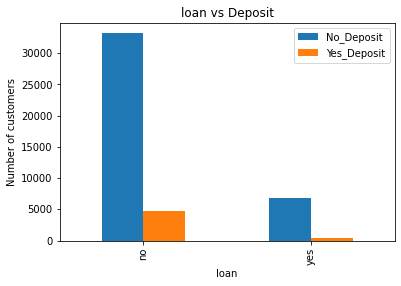

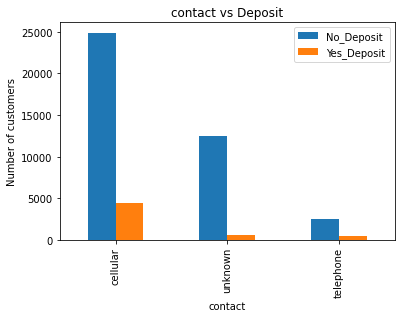

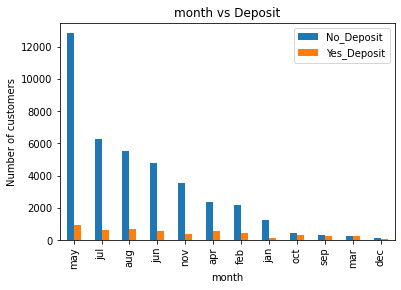

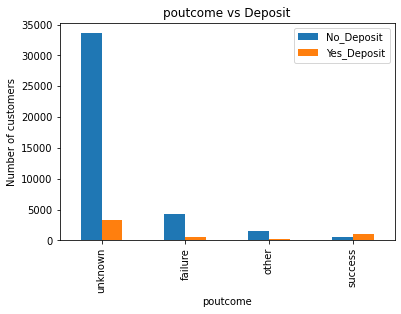

In [ ]:
for i in cat_features:
  bivariate(i)

In the above bivariate plotting we can how each feature contributing for deposit either yes or no.

In [ ]:
balance = pd.DataFrame()
balance['balance_yes'] = (bank_df[bank_df['y'] == 'yes'][['y','balance']].describe())
balance['balance_no'] = (bank_df[bank_df['y'] == 'no'][['y','balance']].describe())
balance

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


Text(0.5, 1.0, 'Balance vs Deposit')

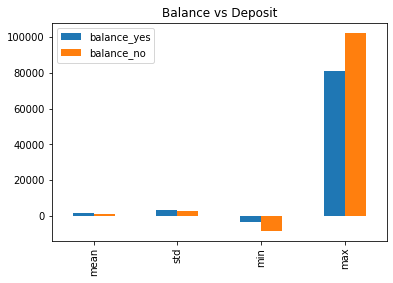

In [ ]:
balance=balance.drop(['25%','50%','75%','count'])
balance.plot.bar()
plt.title('Balance vs Deposit')

In the above plotting we can see how balance is dependent on deposit.

In [ ]:
num_df=bank_df.describe().columns
num_df

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

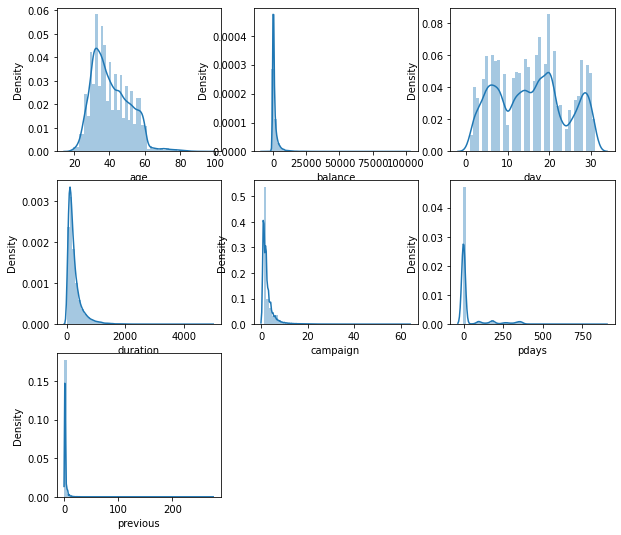

In [ ]:
plt.figure(figsize=(10,9))
count=1
for i in num_df:
  ax=plt.subplot(3,3,count)
  sns.distplot(bank_df[i])
  count+=1
plt.show()

In the above plot we can see how the features are distributed. balance, pdays and previous features are normally distributed.

In [ ]:
#changing duration from seconds to minutes
bank_df['duration']=bank_df['duration']/60

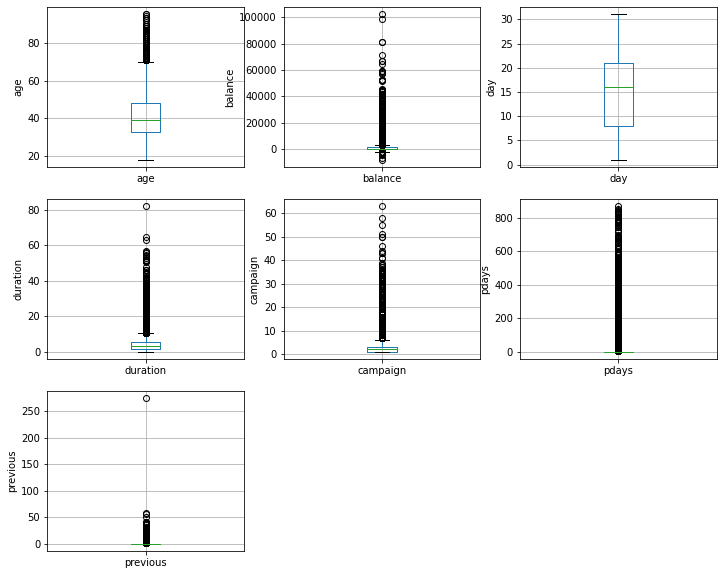

In [ ]:
plt.figure(figsize=(12,10))
count=1
for i in num_df:
  ax=plt.subplot(3,3,count)
  bank_df.boxplot(column=i, ax=ax)
  ax.set_ylabel(i)
  count+=1
plt.show()

In the above plot we can check for the outliers only age feature can be considered for this problem as higher the age lesser the chance of taking scheme.

In [ ]:
print(bank_df.shape)
p_1=np.percentile(bank_df['age'],25)
p_3=np.percentile(bank_df['age'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
bank_df=bank_df[bank_df['age']>low_lim]
bank_df=bank_df[bank_df['age']<up_lim]

bank_df.shape

(45211, 17)


(44724, 17)

We have removed the outliers from the age column. The new dataset has 44724 rows and 17 columns.

In [ ]:
cat_features

['marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_df['marital']=le.fit_transform(bank_df['marital'])
bank_df['education']=le.fit_transform(bank_df['education'])
bank_df['default']=le.fit_transform(bank_df['default'])
bank_df['housing']=le.fit_transform(bank_df['housing'])
bank_df['loan']=le.fit_transform(bank_df['loan'])
bank_df['contact']=le.fit_transform(bank_df['contact'])
bank_df['month']=le.fit_transform(bank_df['month'])
bank_df['poutcome']=le.fit_transform(bank_df['poutcome'])
bank_df['job']=le.fit_transform(bank_df['job'])
bank_df['y']=le.fit_transform(bank_df['y'])

We have changed categorical features to numeric features using label encoder.

In [ ]:
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,4.350000,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,2.516667,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1.266667,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1.533333,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,3.300000,1,-1,0,3,0


Text(0.5, 1.0, 'Correlation Plot')

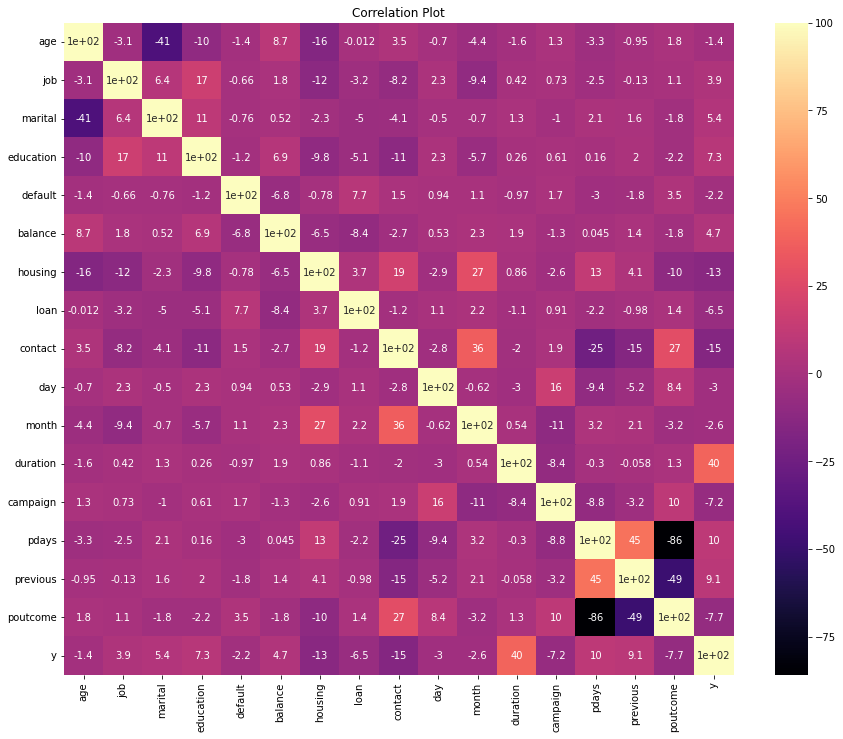

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(bank_df.corr()*100,annot=True,cmap='magma')
plt.title('Correlation Plot')

The above heatmap shows how each feature is corelated with each other.

###Model Training and Testing

In [ ]:
X=bank_df.drop(['y'],axis=1)
y=bank_df['y']

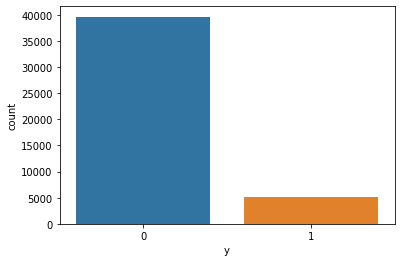

In [ ]:
sns.countplot(x='y',data=bank_df)

Here we can see the target column is imbalanced, we will create models on this data and later we will check with resampled data.|

In [ ]:
y.value_counts()

0    39653
1     5071
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
print((X_train.shape),(X_test.shape),(y_train.shape),(y_test.shape))

(31306, 16) (13418, 16) (31306,) (13418,)


In [ ]:
X_train['job'].unique()

array([ 9,  0,  4,  1,  7,  8, 10,  5,  2,  6,  3, 11])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
temp=X
temp=scaler.fit_transform(temp)

In [ ]:
from seaborn import regression
def adj_r2(x,y,r2):
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2 =1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = temp
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables,i)for i in range(variables.shape[1])]
vif["Features"]=X.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
vif

,VIF,Features
0,1.268084,age
1,1.049770,job
2,1.223422,marital
3,1.066564,education
4,1.011754,default
5,1.031449,balance
6,1.179675,housing
7,1.020519,loan
8,1.325944,contact
9,1.040125,day


Here we have checked for variation inflation factor and no feature is above the value of 5, so we can proceed with this dataset without any modifications.

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lm_accuracy= lr.score(X_test,y_test)
lm_y_pred=lr.predict(X_test)

In [ ]:
print("Accuracy :",lm_accuracy)

Accuracy : 0.8912654643016843


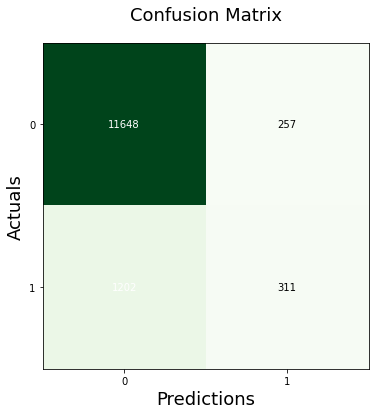

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=lm_y_pred)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test,lm_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11905
           1       0.55      0.21      0.30      1513

    accuracy                           0.89     13418
   macro avg       0.73      0.59      0.62     13418
weighted avg       0.87      0.89      0.87     13418



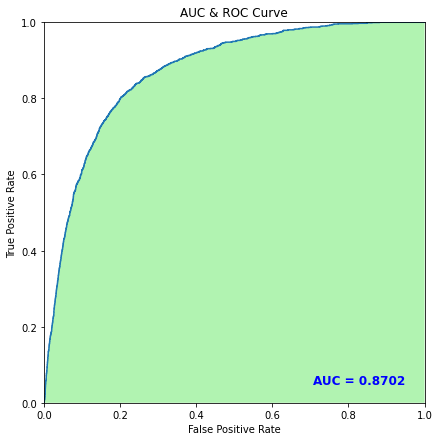

In [ ]:
y_pred=lr.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The above logistic regression model is giving us 89.1% accuracy.

---



###SVC

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf',probability=True)
sv.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svc_accuracy= sv.score(X_test,y_test)
svc_y_pred=sv.predict(X_test)

In [ ]:
print("Accuracy :",svc_accuracy)

Accuracy : 0.899985094648979


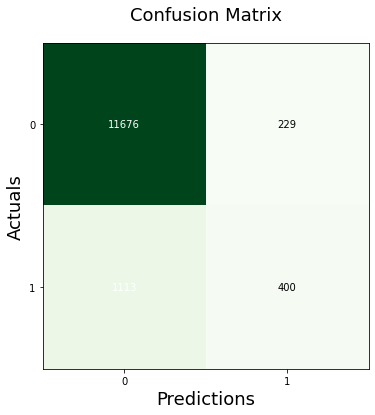

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=svc_y_pred)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11905
           1       0.64      0.26      0.37      1513

    accuracy                           0.90     13418
   macro avg       0.77      0.62      0.66     13418
weighted avg       0.88      0.90      0.88     13418



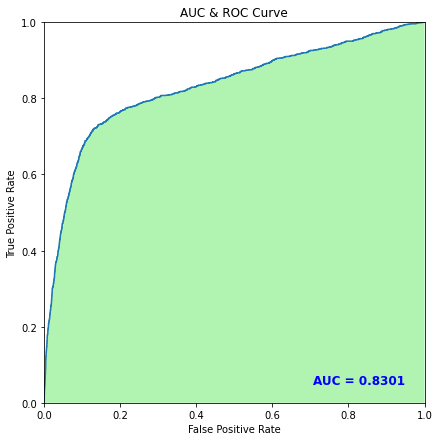

In [ ]:
y_pred=sv.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The above SVM model is giving us 89.9% accuracy.

###Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
gnb_accuracy= gnb.score(X_test,y_test)
gnb_y_pred=gnb.predict(X_test)

In [ ]:
print("Accuracy :",gnb_accuracy)

Accuracy : 0.8370099865851841


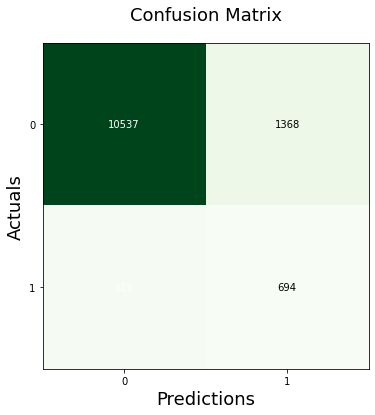

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=gnb_y_pred)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test,gnb_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11905
           1       0.34      0.46      0.39      1513

    accuracy                           0.84     13418
   macro avg       0.63      0.67      0.65     13418
weighted avg       0.86      0.84      0.85     13418



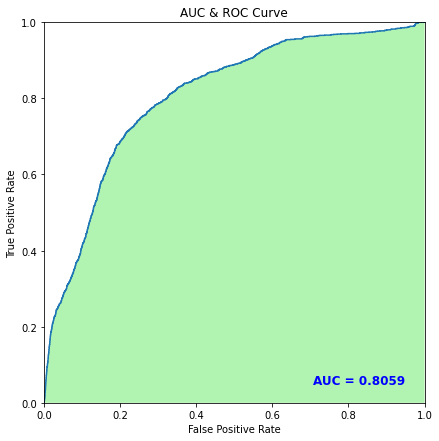

In [ ]:
y_pred=gnb.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The above gaussian naive bayes model is giving us the accuracy of 84%.

###RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1,min_samples_leaf=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=100, n_jobs=-1)

In [ ]:
rfc_accuracy= rfc.score(X_test,y_test)
rfc_y_pred=rfc.predict(X_test)

In [ ]:
print("Accuracy :",rfc_accuracy)

Accuracy : 0.9008048889551349


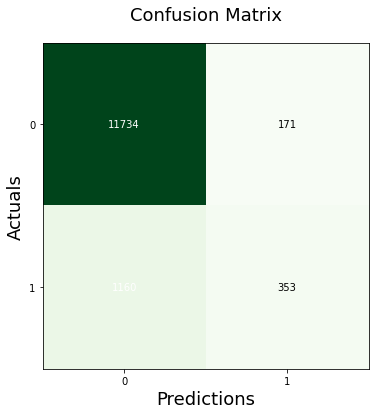

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=rfc_y_pred)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11905
           1       0.67      0.23      0.35      1513

    accuracy                           0.90     13418
   macro avg       0.79      0.61      0.65     13418
weighted avg       0.88      0.90      0.88     13418



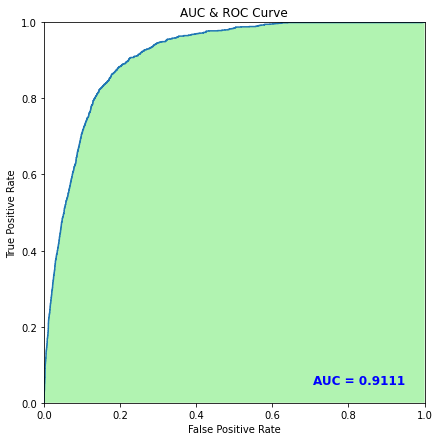

In [ ]:
y_pred=rfc.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
important = rfc.feature_importances_

important_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : important}

important_df = pd.DataFrame(important_dict)
important_df['Feature Importance'] = round(important_df['Feature Importance'],2)

In [ ]:
important_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
important_df

,Feature,Feature Importance
11,duration,0.54
15,poutcome,0.12
10,month,0.07
13,pdays,0.07
6,housing,0.06
0,age,0.03
8,contact,0.03
5,balance,0.02
14,previous,0.02
2,marital,0.01


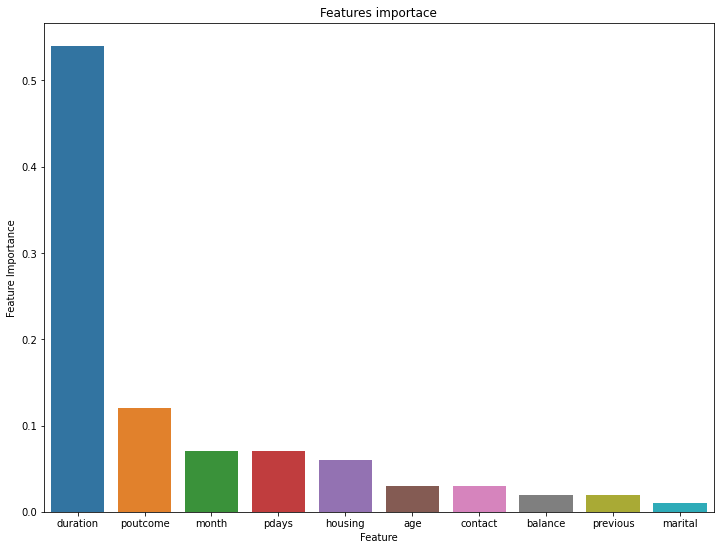

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=important_df[:10])

The above RandomForest Classifier is giving us 90% accuracy.

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [ ]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18],
               'n_neighbors' : [7]
              }

In [ ]:
knn_accuracy= knn.score(X_test,y_test)
knn_y_pred=knn.predict(X_test)

In [ ]:
print("Accuracy :",knn_accuracy)

Accuracy : 0.897302131465196


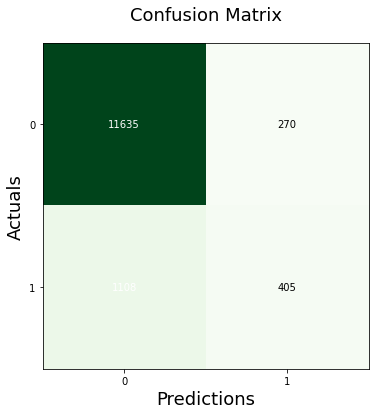

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=knn_y_pred)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11905
           1       0.60      0.27      0.37      1513

    accuracy                           0.90     13418
   macro avg       0.76      0.62      0.66     13418
weighted avg       0.88      0.90      0.88     13418



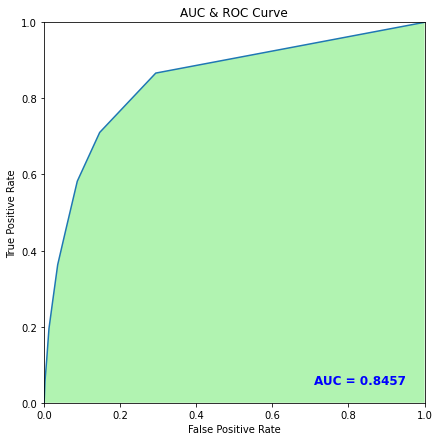

In [ ]:
y_pred=knn.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.900 total time=   4.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.900 total time=   4.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.896 total time=   4.5s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.900 total time=   4.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.896 total time=   4.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.900 total time=   3.2s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.900 total time=   3.2s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.896 total time=   3.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.900 total time=   3.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.896 total time=   3.1s


GridSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18,
                                            n_neighbors=11),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18], 'n_neighbors': [7]},
             verbose=3)

In [ ]:
knn=KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [ ]:
knn_accuracy= knn.score(X_test,y_test)
knn_y_pred=knn.predict(X_test)

In [ ]:
print("Accuracy :",knn_accuracy)

Accuracy : 0.897302131465196


The above KNN model gave 89% accuracy

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=55)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=55)

In [ ]:
ada_pred = ada_boost.predict(X_test)
ada_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(ada_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12508
           1       0.34      0.57      0.43       910

    accuracy                           0.90     13418
   macro avg       0.66      0.75      0.69     13418
weighted avg       0.92      0.90      0.91     13418



In [ ]:
ada_boost.feature_importances_

array([0.05454545, 0.01818182, 0.03636364, 0.03636364, 0.        ,
       0.01818182, 0.03636364, 0.01818182, 0.03636364, 0.07272727,
       0.16363636, 0.27272727, 0.03636364, 0.07272727, 0.01818182,
       0.10909091])

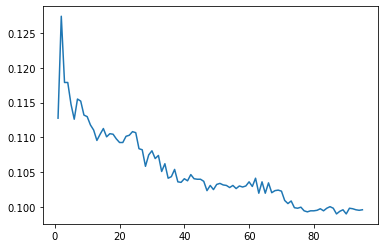

In [ ]:
err_rates = []
for i in range(1,96):
  ada_models = AdaBoostClassifier(n_estimators=i)
  ada_models.fit(X_train,y_train)
  ada_preds = ada_models.predict(X_test)
  err = 1-accuracy_score(y_test,ada_preds)
  err_rates.append(err)

plt.plot(range(1,96),err_rates)

In [ ]:
ada_models

AdaBoostClassifier(n_estimators=95)

In [ ]:
ada_models.feature_importances_

array([0.04210526, 0.02105263, 0.02105263, 0.03157895, 0.        ,
       0.03157895, 0.02105263, 0.02105263, 0.02105263, 0.09473684,
       0.25263158, 0.24210526, 0.03157895, 0.07368421, 0.01052632,
       0.08421053])

In [ ]:
feats = pd.DataFrame(index = X.columns,data = ada_models.feature_importances_,columns = ['Importance'])
feats

,Importance
age,0.042105
job,0.021053
marital,0.021053
education,0.031579
default,0.000000
balance,0.031579
housing,0.021053
loan,0.021053
contact,0.021053
day,0.094737


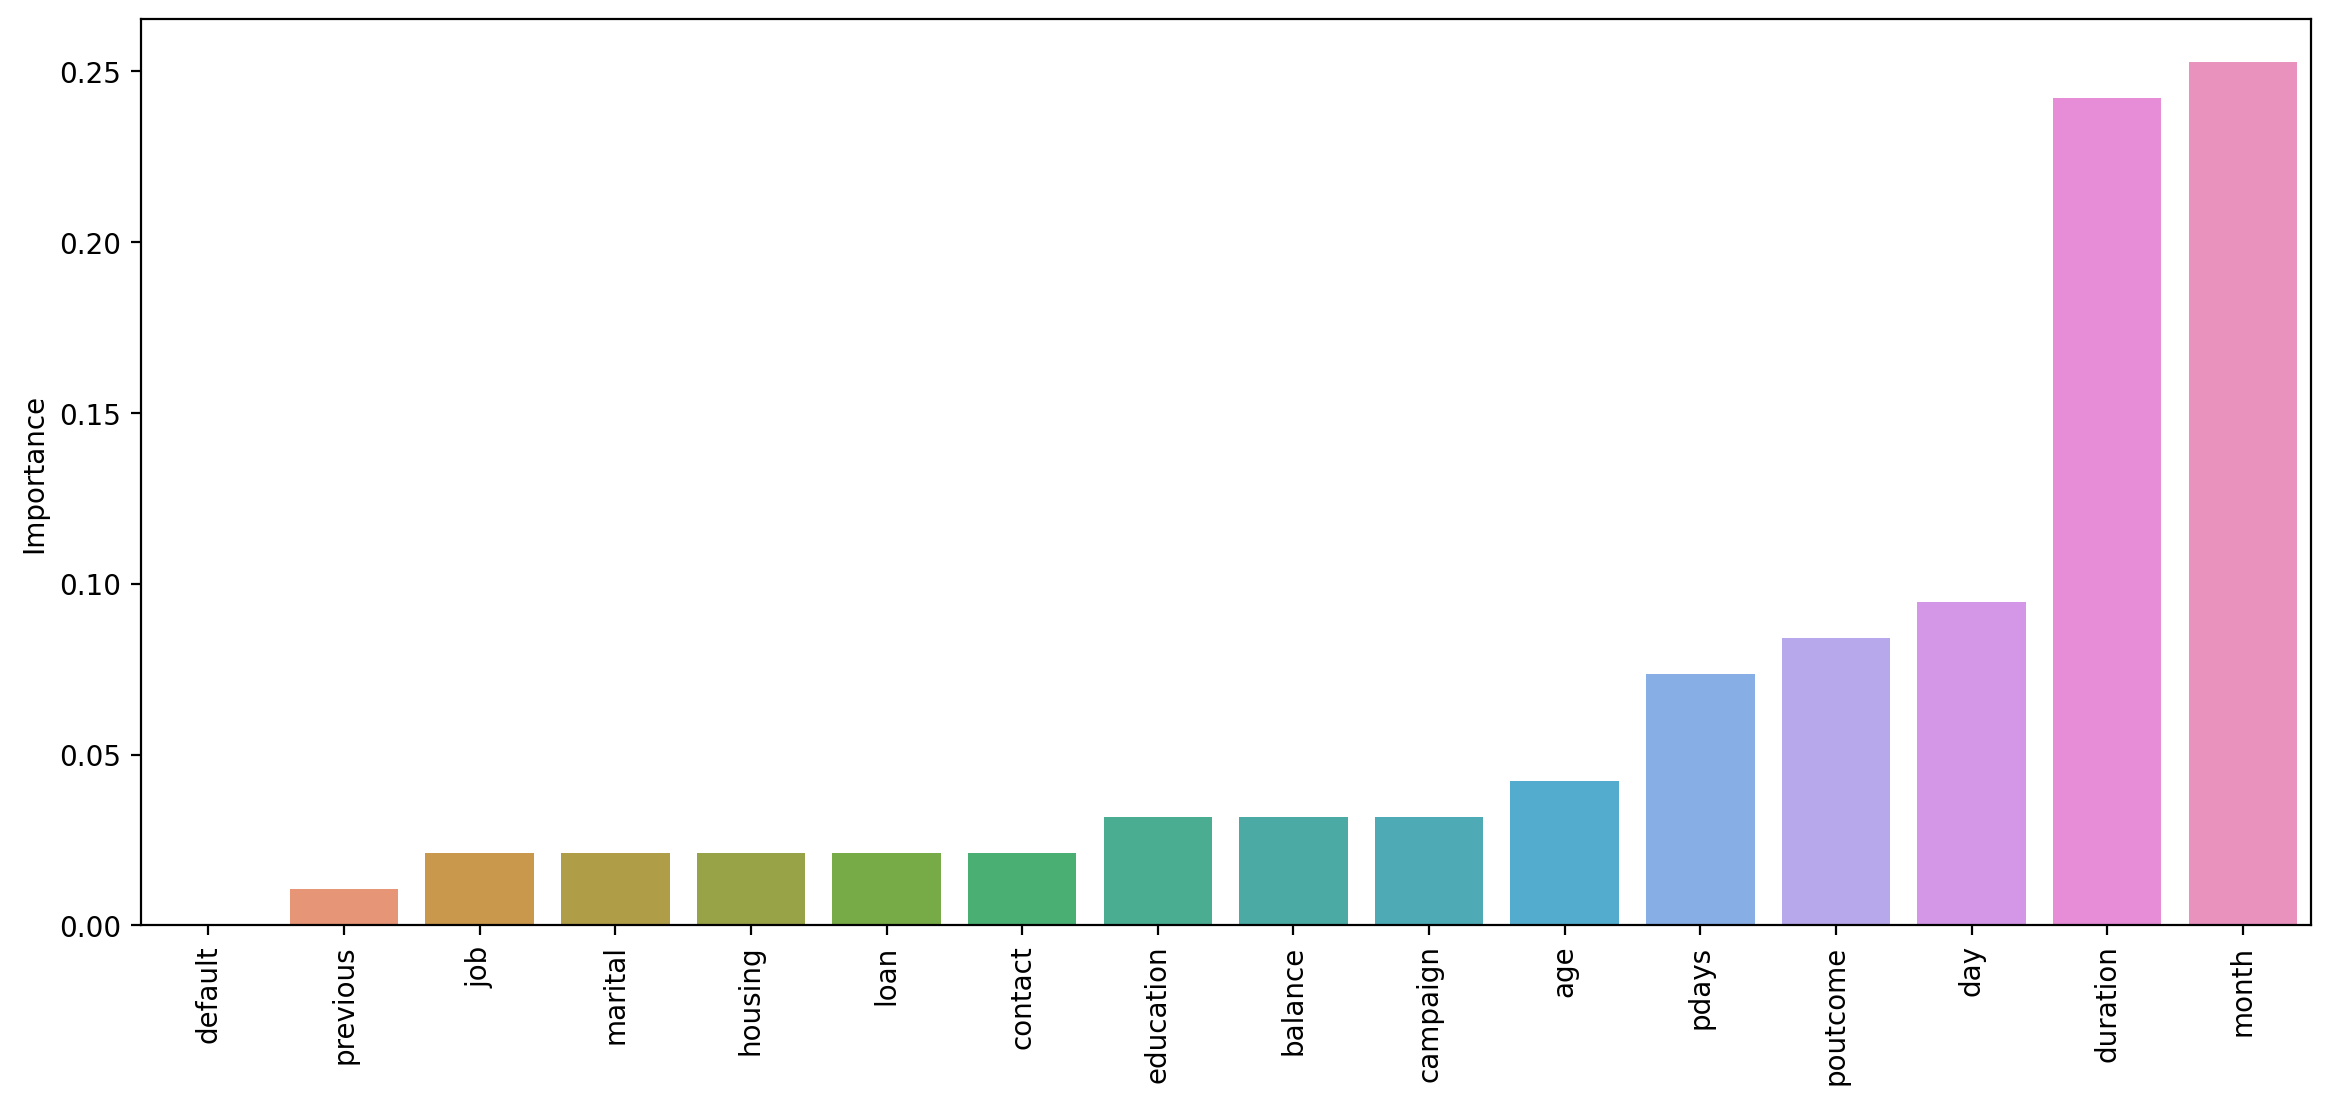

In [ ]:
plt.figure(figsize=(14,6),dpi = 200)
sns.barplot(data=feats.sort_values('Importance'),x = feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
ada_accuracy = ada_models.score(X_test,y_test)
print(f'ada accuracy :{ada_accuracy}')

ada accuracy :0.9004322551796095


The above AdaBoost classifier gave 90% accuracy

GradientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {'n_estimators':[1,5,10,20,30,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()

grid_gb_model = GridSearchCV(gb_model,param_grid)

grid_gb_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 30, 40, 100]})

In [ ]:
grid_gb_model.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
gb_preds = grid_gb_model.predict(X_test)


In [ ]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11905
           1       0.62      0.45      0.52      1513

    accuracy                           0.91     13418
   macro avg       0.78      0.71      0.73     13418
weighted avg       0.90      0.91      0.90     13418



In [ ]:
grid_model = GradientBoostingClassifier(max_depth = 5,n_estimators=100)

In [ ]:
grid_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5)

In [ ]:
grid_gb_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 30, 40, 100]})

In [ ]:
feat_imp_gb = grid_model.feature_importances_
imp_gb_feats = pd.DataFrame(index = X.columns,data=feat_imp_gb,columns=['Importance'])
imp_gb_feats

,Importance
age,0.043838
job,0.006407
marital,0.006645
education,0.008093
default,0.001055
balance,0.030357
housing,0.038861
loan,0.005389
contact,0.042460
day,0.037059


In [ ]:
imp_gb_feats.sort_values(['Importance'],ascending=False)

,Importance
duration,0.434482
month,0.148986
pdays,0.095811
poutcome,0.084778
age,0.043838
contact,0.042460
housing,0.038861
day,0.037059
balance,0.030357
previous,0.008374


In [ ]:
imp_gb_feats.sort_values('Importance')

,Importance
default,0.001055
loan,0.005389
job,0.006407
marital,0.006645
campaign,0.007403
education,0.008093
previous,0.008374
balance,0.030357
day,0.037059
housing,0.038861


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

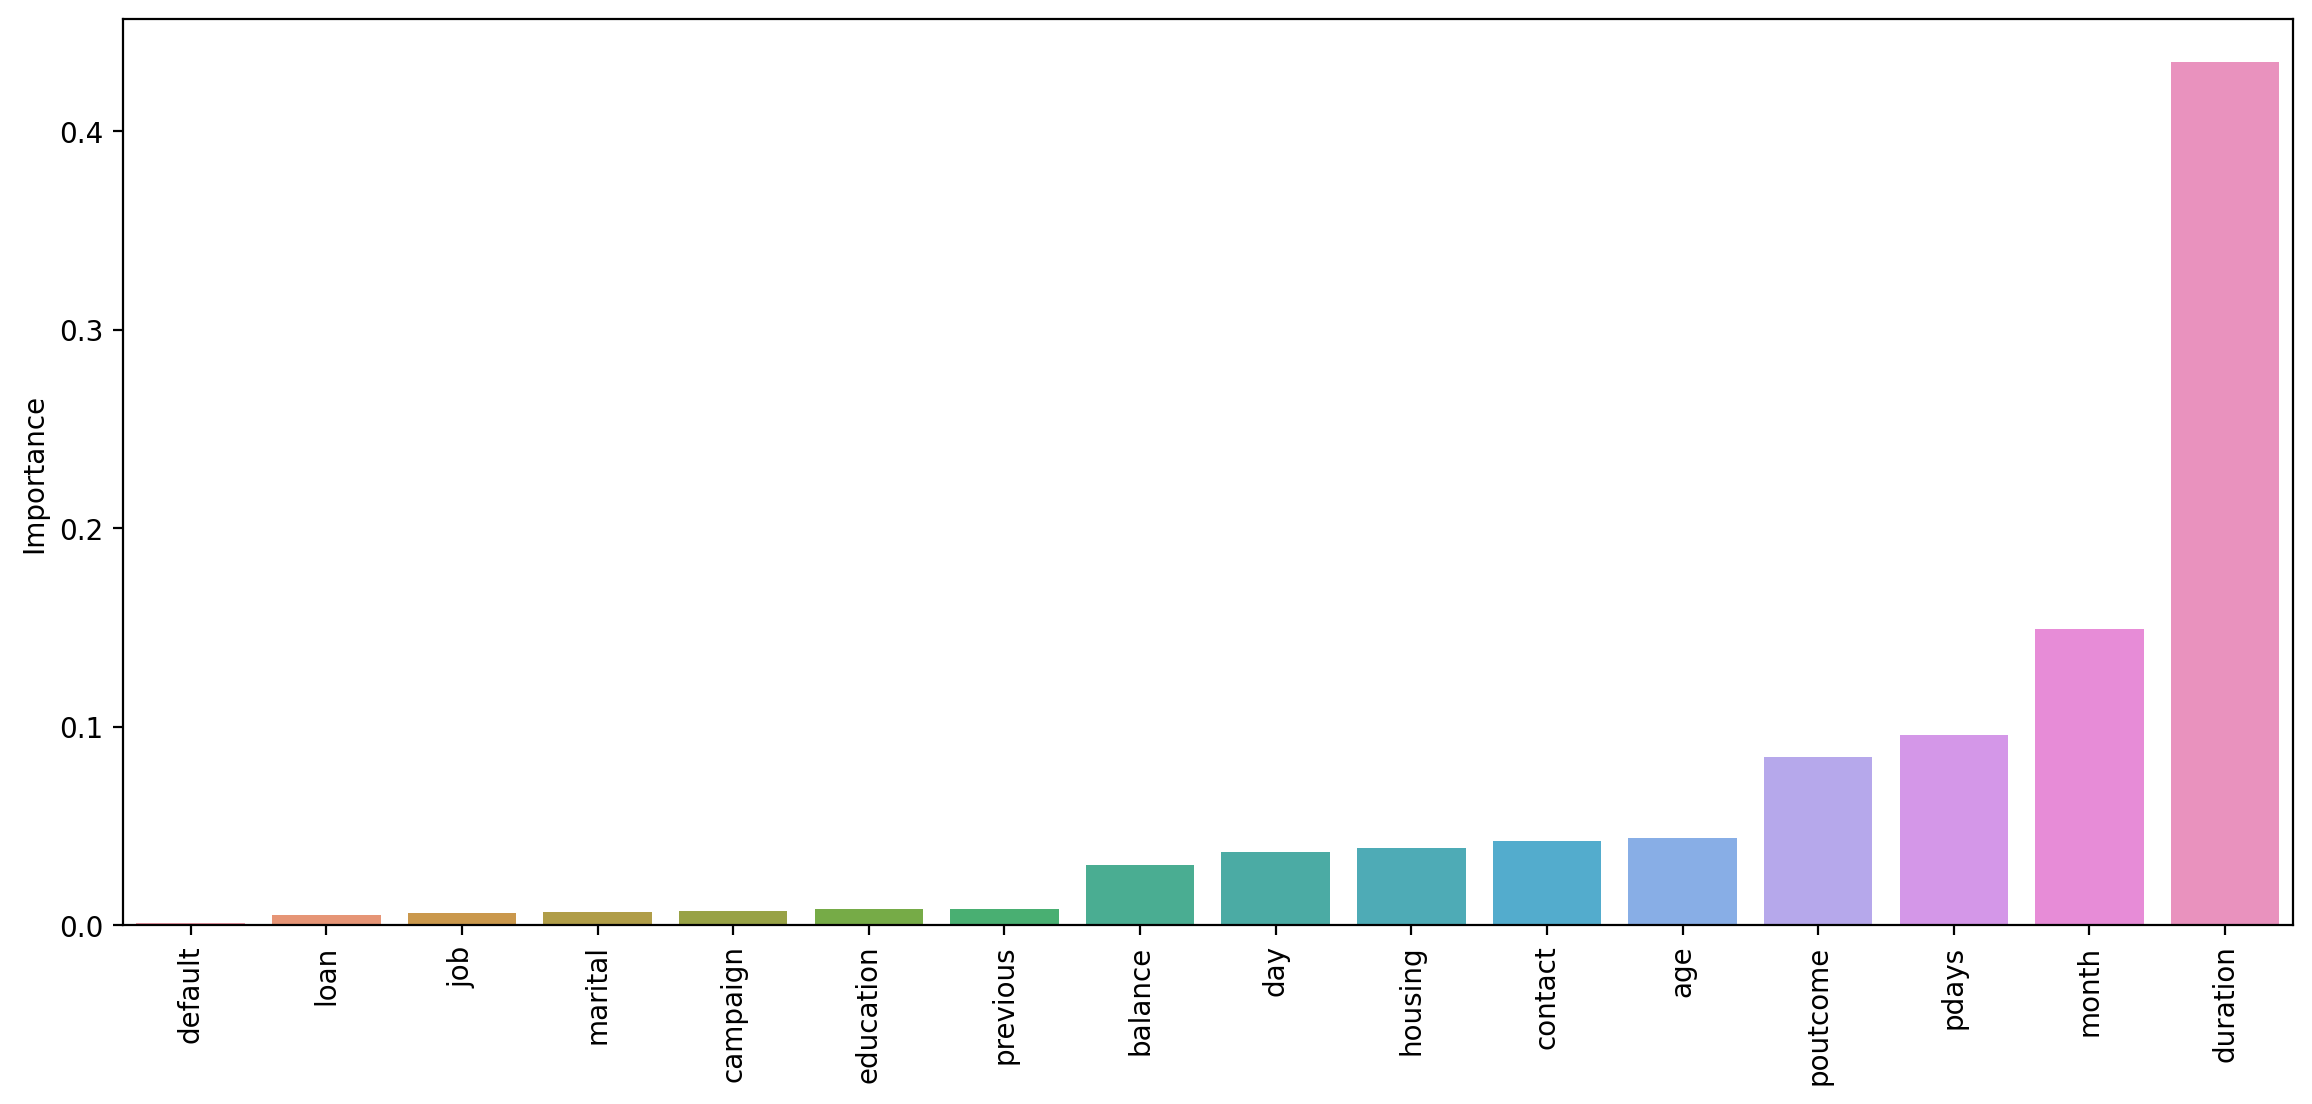

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_gb_feats.sort_values('Importance'),x=imp_gb_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)

In [ ]:
gb_model_accuracy = grid_model.score(X_test,y_test)
print(f'Gradient Boosting accuracy: {gb_model_accuracy}')

Gradient Boosting accuracy: 0.9069906096288568


In [ ]:
from sklearn.metrics import roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test,gb_preds)}')

roc_auc_score: 0.706298041917549


The above GradientBoost Classifier gave 70% accuracy

XB_Boosting-->

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = {'learning_rate':[0.05, 0.15, 0.20, 0.25],
             'max_depth':[1,3,5,9,10],
             'min_child_weight':[1, 3, 5],
             'gamma':[ 0.1, 0.2 , 0.3],
             'colsample_bytree':[ 0.4, 0.5]}

In [ ]:
xg_model=XGBClassifier()
grid_xg_model = GridSearchCV(xg_model,param_grid)

In [ ]:
grid_xg_model.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.4, 0.5],
                         'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.05, 0.15, 0.2, 0.25],
                         'max_depth': [1, 3, 5, 9, 10],
                         'min_child_weight': [1, 3, 5]})

In [ ]:
grid_xg_model.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.25,
 'max_depth': 5,
 'min_child_weight': 3}

In [ ]:
xg_model = XGBClassifier(colsample_bytree = 0.5, gamma = 0.3,learning_rate = 0.25,max_depth = 5,min_child_weight = 1)

In [ ]:
xg_model.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=5)

In [ ]:
feat_imp_xg = xg_model.feature_importances_
imp_xg_feats = pd.DataFrame(index = X.columns,data=feat_imp_xg,columns=['Importance'])
imp_xg_feats

,Importance
age,0.031511
job,0.013574
marital,0.020159
education,0.021896
default,0.018938
balance,0.020326
housing,0.113015
loan,0.046427
contact,0.128279
day,0.033181


In [ ]:
xg_model_accuracy = xg_model.score(X_test,y_test)
print(f'XG Boosting accuracy: {xg_model_accuracy}')

XG Boosting accuracy: 0.9052019675063347


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

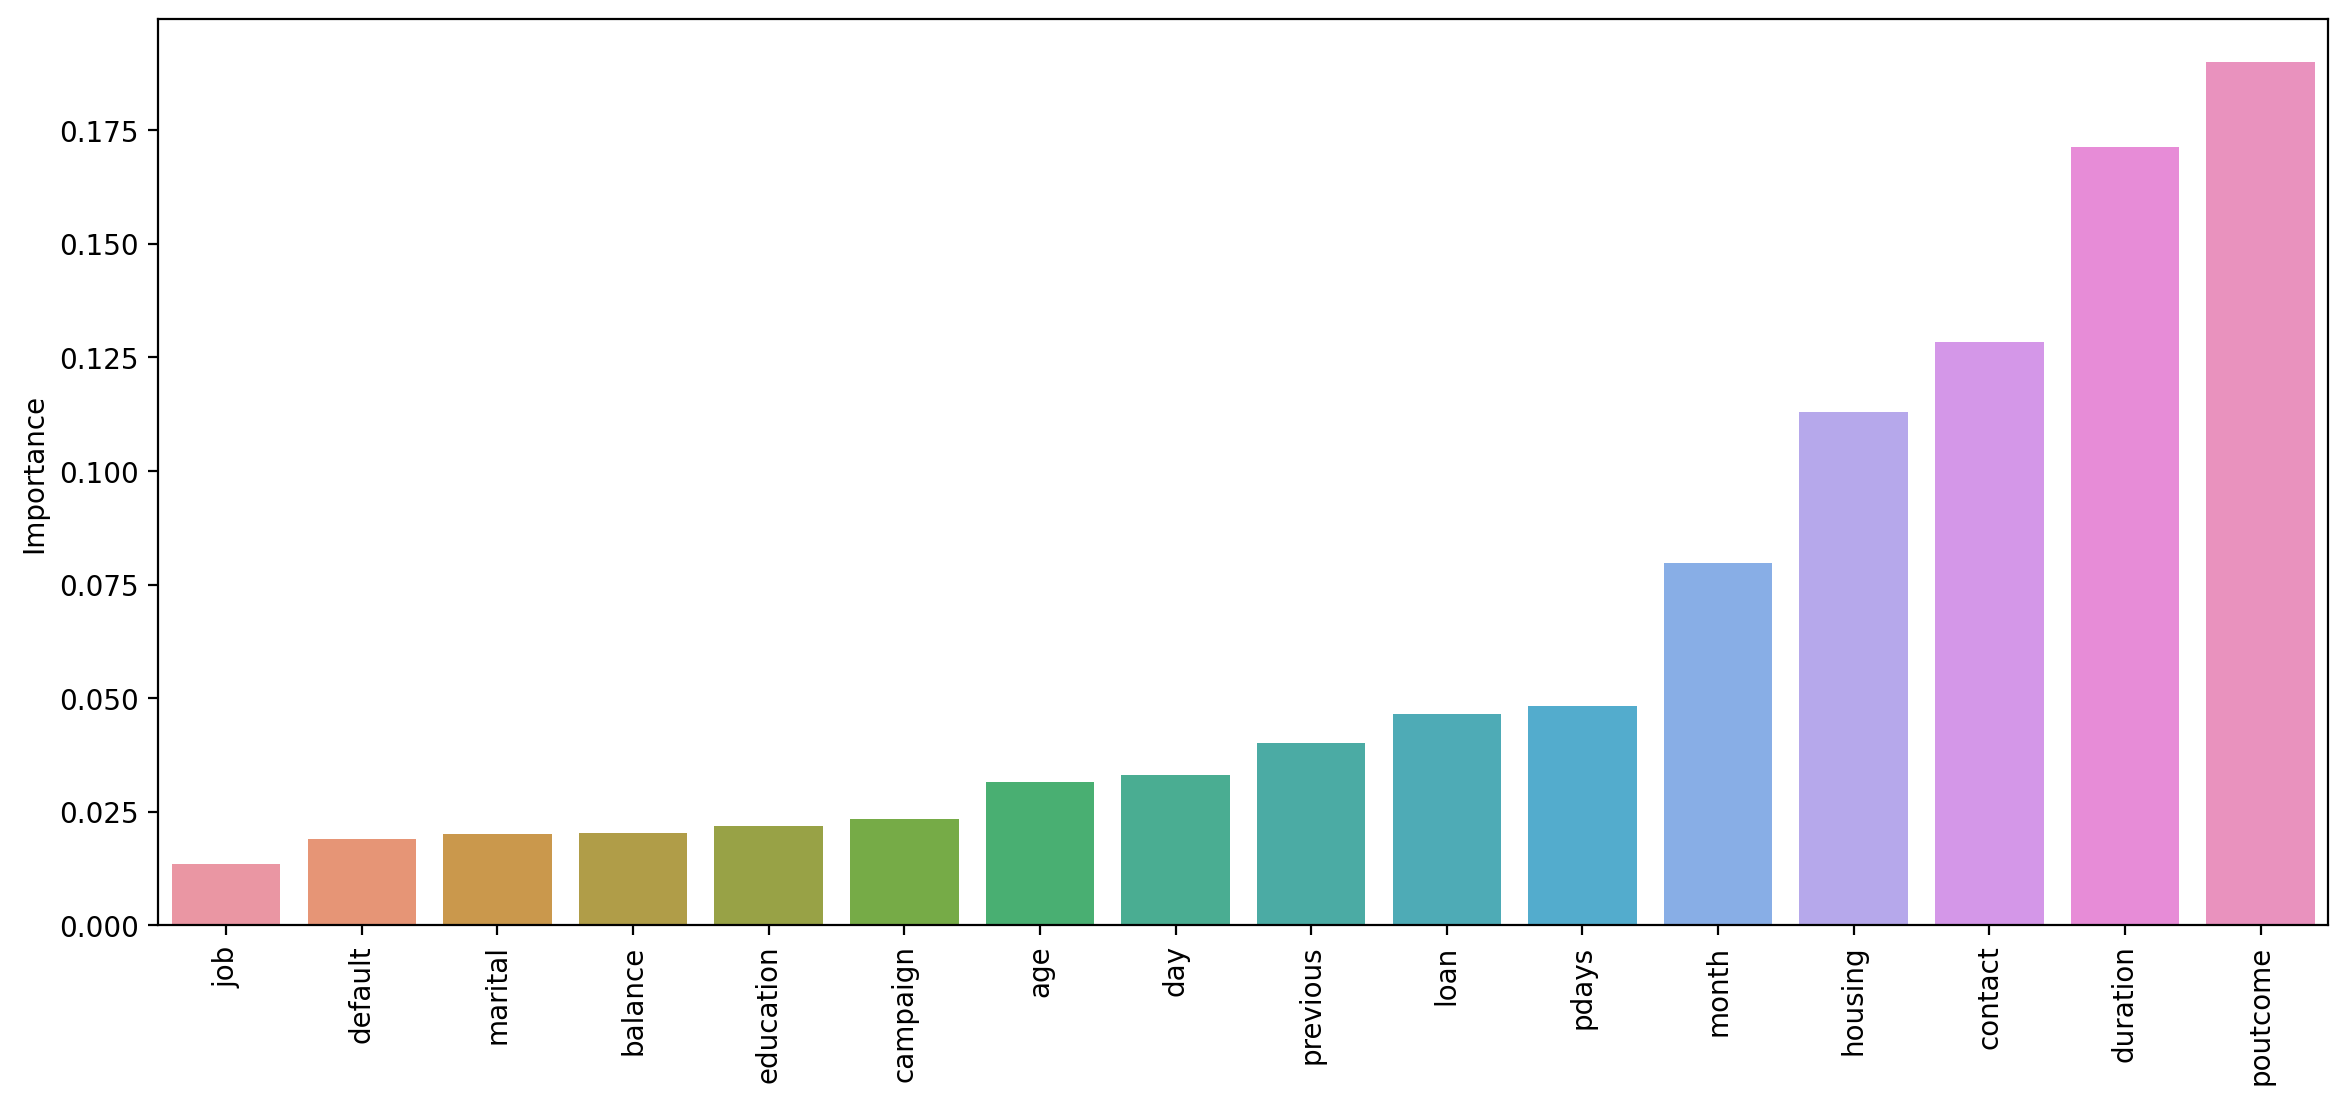

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_xg_feats.sort_values('Importance'),x=imp_xg_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)

In [ ]:
xg_preds = xg_model.predict(X_test)

In [ ]:
xg_model_accuracy = xg_model.score(X_test,y_test)
print(f'XGBoosting accuracy: {xg_model_accuracy}')

XGBoosting accuracy: 0.9052019675063347


In [ ]:
from sklearn.metrics import roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test,xg_preds)}')

roc_auc_score: 0.7059929997698791


The above XGBoost Classifier gave 90% accuracy

SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smot=SMOTE(sampling_strategy='minority',random_state=42)
oversample_X,oversample_Y= smot.fit_resample(bank_df.drop('y',axis=1),bank_df['y'])
oversample=pd.concat([pd.DataFrame(oversample_Y),pd.DataFrame(oversample_X)],axis=1)

Here we have performed SMOTE which is used for oversampling and the final oversampled data has equal amount of 0's and 1's in the target feature.

In [ ]:
oversample['y'].value_counts()

0    39653
1    39653
Name: y, dtype: int64

In [ ]:
X_o=oversample.drop(['y'],axis=1)
y_o=oversample['y']

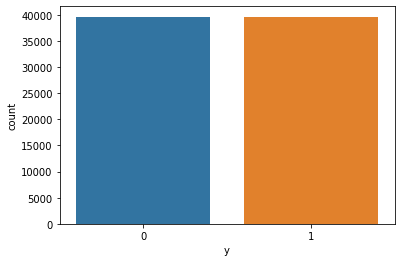

In [ ]:
sns.countplot(x='y',data=oversample)

In [ ]:
X_train_o,X_test_o,y_train_o,y_test_o=train_test_split(X_o,y_o,test_size=0.3,random_state=0)

In [ ]:
print((X_train_o.shape),(X_test_o.shape),(y_train_o.shape),(y_test_o.shape))

(55514, 16) (23792, 16) (55514,) (23792,)


In [ ]:
X_train_o=scaler.fit_transform(X_train_o)
X_test_o=scaler.fit_transform(X_test_o)

Logistic Regression

In [ ]:
lr_o=LogisticRegression()
lr_o.fit(X_train_o,y_train_o)

LogisticRegression()

In [ ]:
lm_accuracy_o= lr_o.score(X_test_o,y_test_o)
lm_y_pred_o=lr_o.predict(X_test_o)

In [ ]:
print("Accuracy :",lm_accuracy_o)

Accuracy : 0.8620124411566913


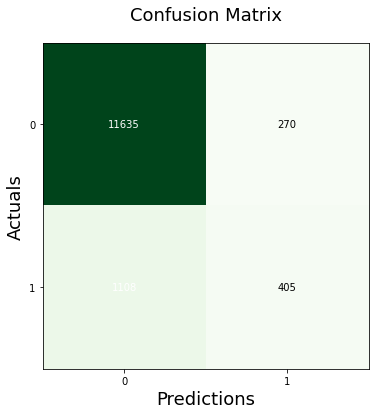

In [ ]:
conf_matrix_o = confusion_matrix(y_true=y_test_o, y_pred=lm_y_pred_o)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

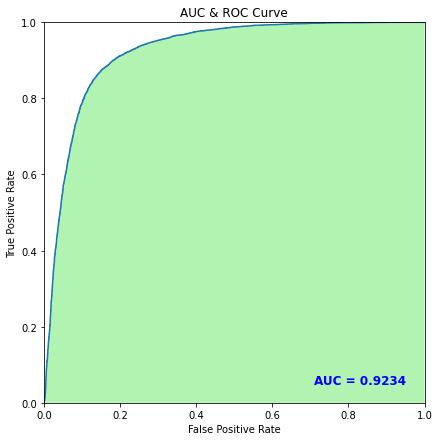

In [ ]:
y_pred_o=lr_o.predict_proba(X_test_o)[:,1]
auc = metrics.roc_auc_score(y_test_o,y_pred_o)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_o, y_pred_o)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The above logistic regression gave us 86% accuracy.

**SVC**

In [ ]:
sv_o=SVC(kernel='rbf',probability=True)
sv_o.fit(X_train_o, y_train_o)

SVC(probability=True)

In [ ]:
svc_accuracy_o= sv_o.score(X_test_o,y_test_o)
svc_y_pred_o=sv_o.predict(X_test_o)

In [ ]:
print("Accuracy :",svc_accuracy_o)

Accuracy : 0.8905094149293881


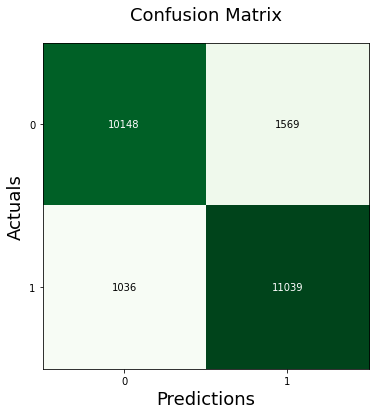

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test_o, y_pred=svc_y_pred_o)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

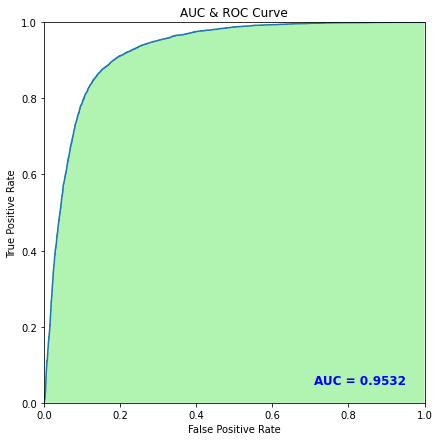

In [ ]:
y_pred=sv_o.predict_proba(X_test_o)[:,1]
auc = metrics.roc_auc_score(y_test_o,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_o, y_pred_o)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The above SVM model gave us 89% accuracy.

Gaussian Naive Bayes

In [ ]:
gnb_o=GaussianNB()
gnb_o.fit(X_train_o,y_train_o)

GaussianNB()

In [ ]:
gnb_accuracy_o= gnb_o.score(X_test_o,y_test_o)
gnb_y_pred_o=gnb_o.predict(X_test_o)

In [ ]:
print("Accuracy :",gnb_accuracy_o)

Accuracy : 0.7460070611970411


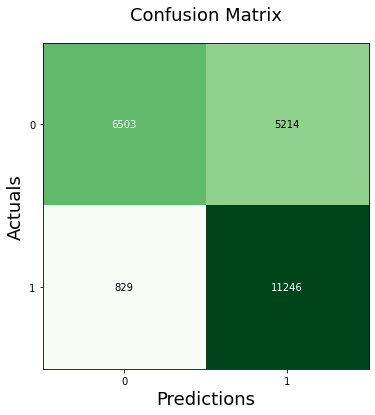

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test_o, y_pred=gnb_y_pred_o)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

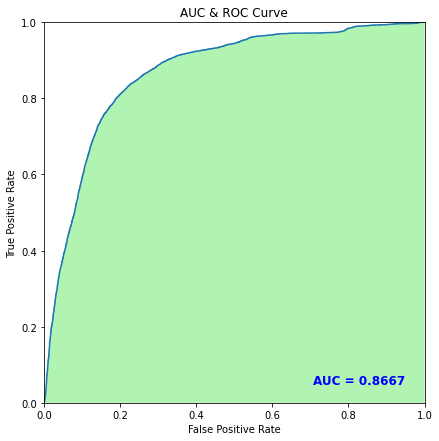

In [ ]:
y_pred=gnb_o.predict_proba(X_test_o)[:,1]
auc = metrics.roc_auc_score(y_test_o,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_o, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The above gaussian naive bayes model gave us 74% accuracy.

RandomForest Classifier

In [ ]:
rfc_o=RandomForestClassifier(n_estimators=100,n_jobs=-1,min_samples_leaf=100)
rfc_o.fit(X_train_o,y_train_o)

RandomForestClassifier(min_samples_leaf=100, n_jobs=-1)

In [ ]:
rfc_accuracy_o= rfc_o.score(X_test_o,y_test_o)
rfc_y_pred_o=rfc_o.predict(X_test_o)

In [ ]:
print("Accuracy :",rfc_accuracy_o)

Accuracy : 0.8840366509751176


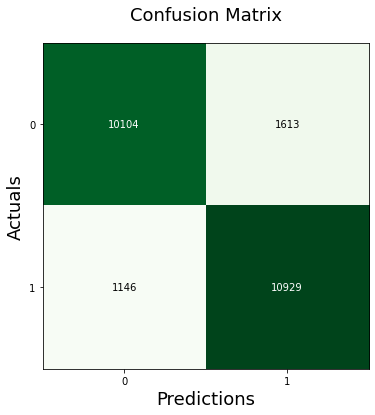

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test_o, y_pred=rfc_y_pred_o)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

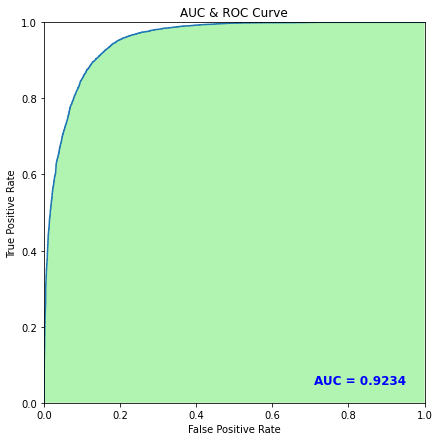

In [ ]:
y_pred=rfc_o.predict_proba(X_test_o)[:,1]
auc = metrics.roc_auc_score(y_test_o,y_pred_o)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_o, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
important = rfc_o.feature_importances_

important_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : important}

important_df = pd.DataFrame(important_dict)
important_df['Feature Importance'] = round(important_df['Feature Importance'],2)


In [ ]:
important_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
important_df

,Feature,Feature Importance
11,duration,0.47
6,housing,0.14
8,contact,0.14
7,loan,0.04
10,month,0.04
12,campaign,0.03
13,pdays,0.03
15,poutcome,0.03
1,job,0.02
0,age,0.01


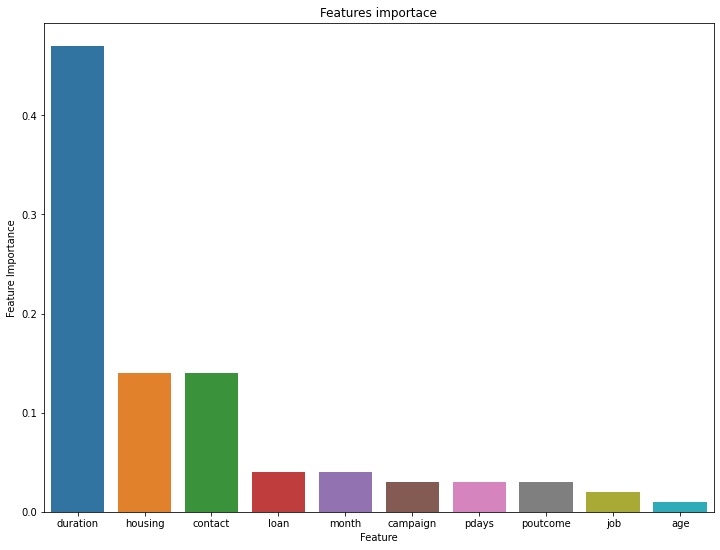

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=important_df[:10])

The above RandomForest Classifier gave us 88% accuracy.

KNN

In [ ]:
knn_o = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
knn_o.fit(X_train_o,y_train_o)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [ ]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18],
               'n_neighbors' : [7]
              }

In [ ]:
knn_accuracy_o= knn_o.score(X_test_o,y_test_o)
knn_y_pred_o=knn_o.predict(X_test_o)

In [ ]:
print("Accuracy :",knn_accuracy_o)

Accuracy : 0.8871889710827169


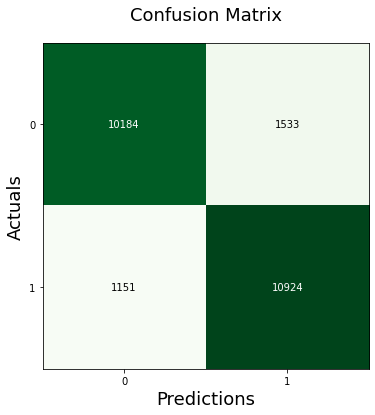

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test_o, y_pred=knn_y_pred_o)
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

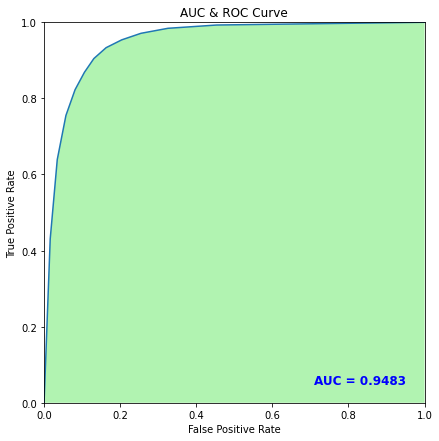

In [ ]:
y_pred=knn_o.predict_proba(X_test_o)[:,1]
auc = metrics.roc_auc_score(y_test_o,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_o, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
gridsearch_o = GridSearchCV(knn, param_grid,verbose=3)
gridsearch_o.fit(X_train_o,y_train_o)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.886 total time=  13.8s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.890 total time=  15.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.894 total time=  14.7s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.886 total time=  13.9s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.889 total time=  13.9s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.886 total time=   7.3s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.890 total time=   7.4s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.894 total time=   7.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.886 total time=   7.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.889 total time=   7.2s


GridSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18,
                                            n_neighbors=11),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18], 'n_neighbors': [7]},
             verbose=3)

In [ ]:
knn_o=KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
knn_o.fit(X_train_o,y_train_o)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [ ]:
knn_accuracy_o= knn_o.score(X_test_o,y_test_o)
knn_y_pred_o=knn_o.predict(X_test_o)

In [ ]:
print("Accuracy :",knn_accuracy_o)

Accuracy : 0.8871889710827169


The above Knn model gave us 88.7% accuracy.

AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model_sam = AdaBoostClassifier(n_estimators=55)
ada_model_sam.fit(X_train_o,y_train_o)

AdaBoostClassifier(n_estimators=55)

In [ ]:
ada_sam_pred = ada_model_sam.predict(X_test_o)

In [ ]:
err_rates = []
for i in range(1,96):
  ada_models = AdaBoostClassifier(n_estimators=i)
  ada_models.fit(X_train_o,y_train_o)
  ada_preds = ada_models.predict(X_test_o)
  err = 1-accuracy_score(y_test_o,ada_preds)
  err_rates.append(err)

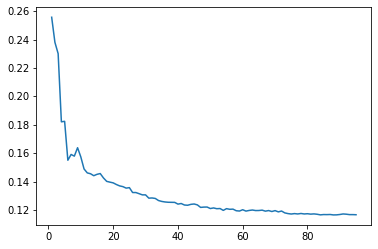

In [ ]:
ada_models_sam = ada_models
plt.plot(range(1,96),err_rates)

In [ ]:
ada_models_sam.feature_importances_

array([0.06315789, 0.08421053, 0.03157895, 0.03157895, 0.01052632,
       0.03157895, 0.01052632, 0.01052632, 0.01052632, 0.06315789,
       0.28421053, 0.18947368, 0.04210526, 0.09473684, 0.        ,
       0.04210526])

In [ ]:
feats_sam = pd.DataFrame(index = X_o.columns,data = ada_models_sam.feature_importances_,columns = ['Importance'])
feats_sam

,Importance
age,0.063158
job,0.084211
marital,0.031579
education,0.031579
default,0.010526
balance,0.031579
housing,0.010526
loan,0.010526
contact,0.010526
day,0.063158


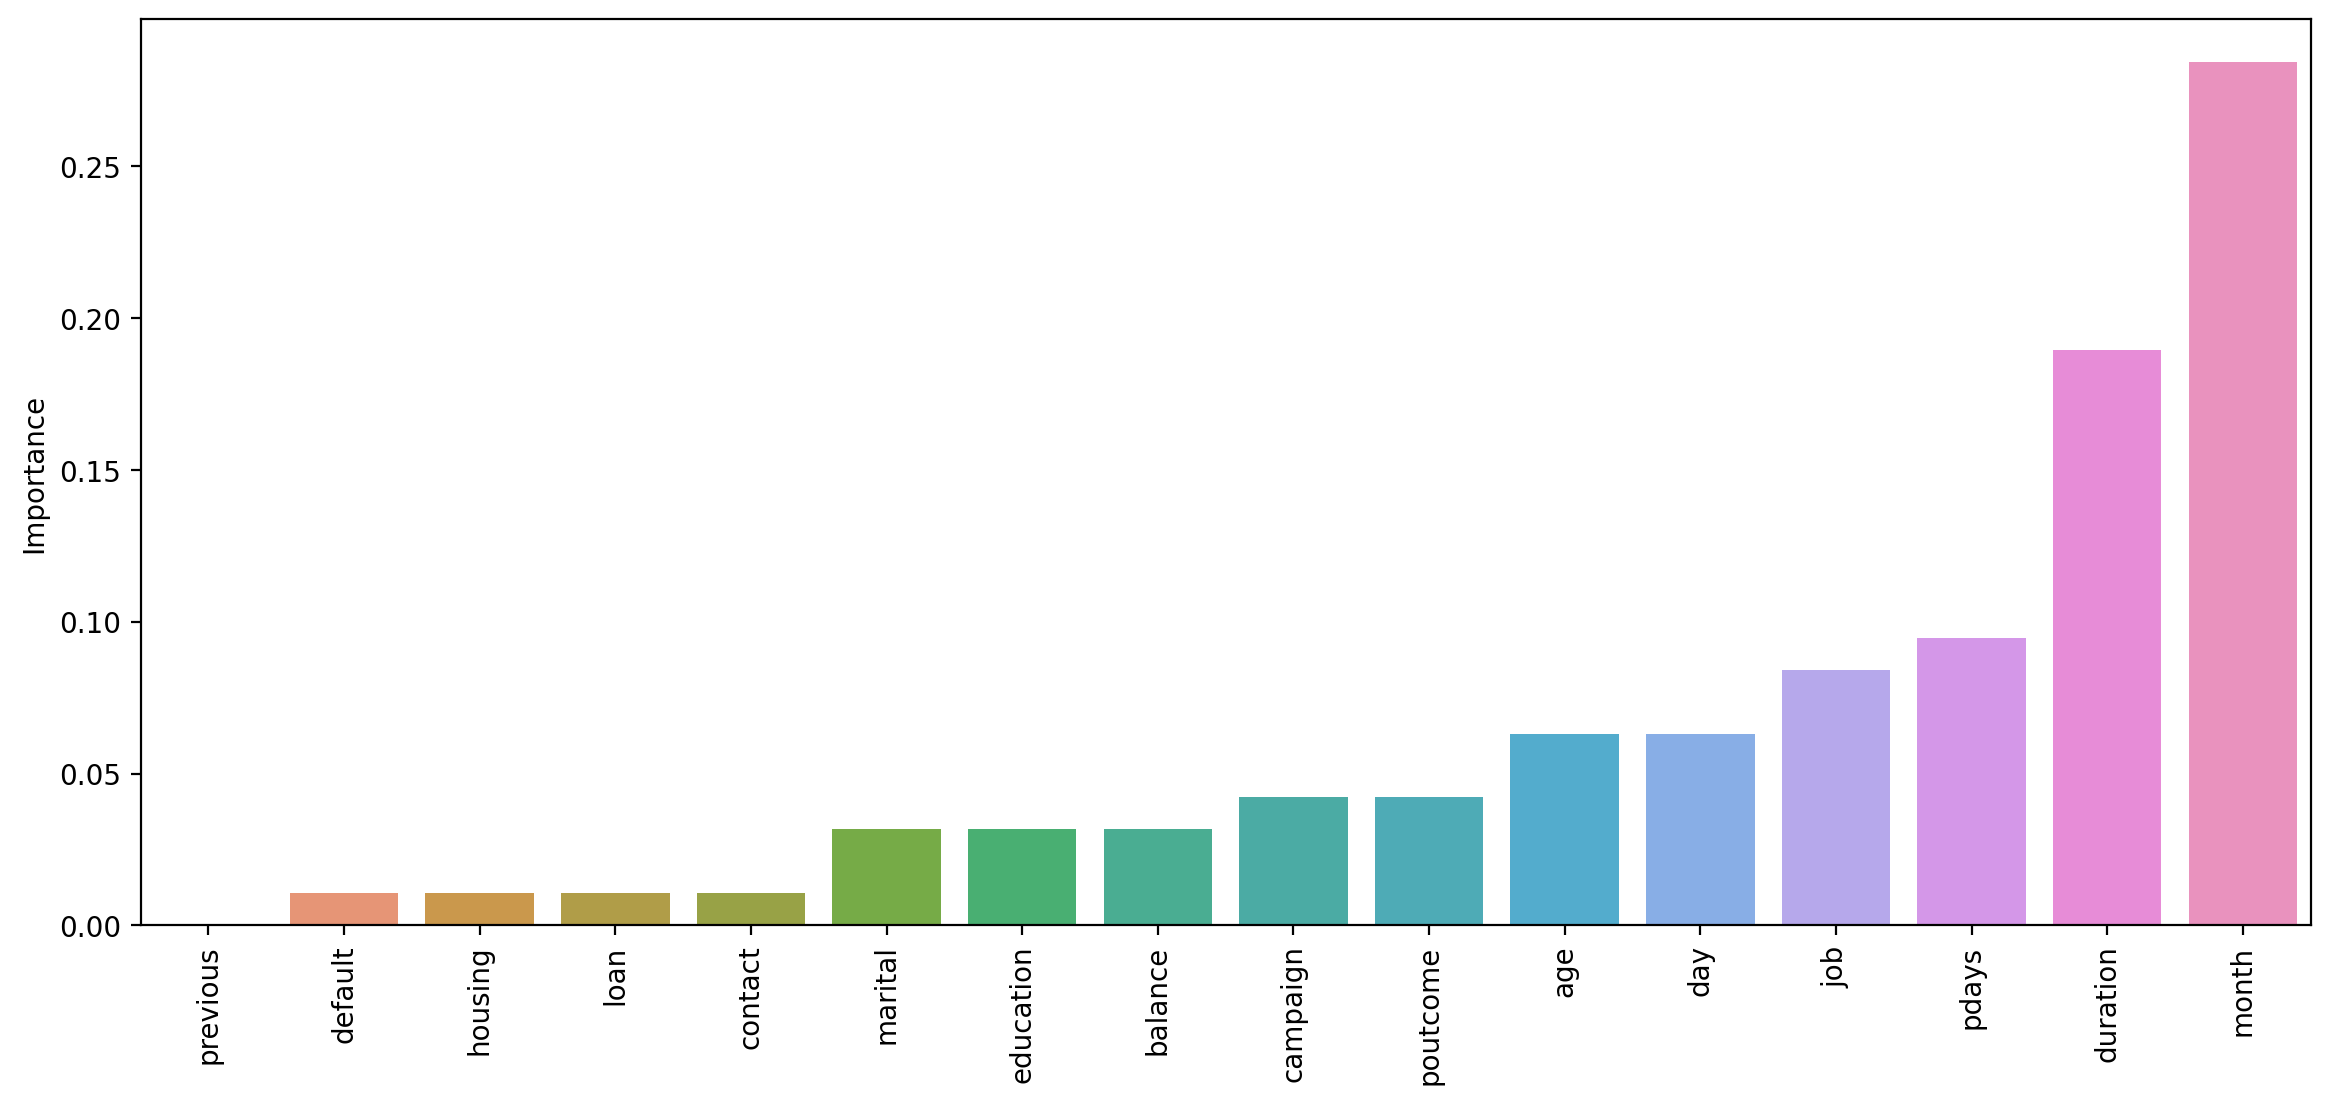

In [ ]:
plt.figure(figsize=(14,6),dpi = 200)
sns.barplot(data=feats_sam.sort_values('Importance'),x = feats_sam.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

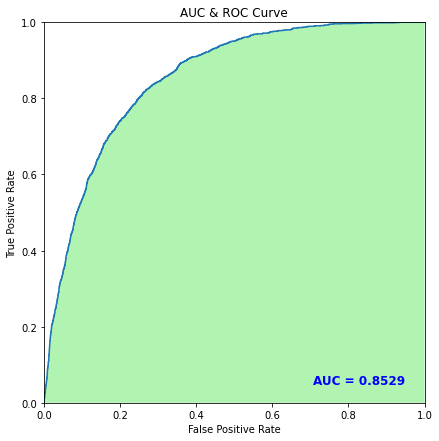

In [ ]:
y_pred=ada_models_sam.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
ada_accuracy = ada_models_sam.score(X_test,y_test)
print(f'ada accuracy :{ada_accuracy}')

ada accuracy :0.6259502161275898


The ADABoost Classifier with resampled data gave 62% accuracy

GradientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[1,5,10,20,30,40,100],'max_depth':[3,4,5,6]}
gb_sam_mod = GradientBoostingClassifier()

In [ ]:
grid_gb_sam = GridSearchCV(gb_sam_mod,param_grid)

In [ ]:
grid_gb_sam.fit(X_train_o,y_train_o)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 30, 40, 100]})

In [ ]:
grid_gb_sam.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [ ]:
grad_samp_model = GradientBoostingClassifier(n_estimators=100, max_depth = 6)
grad_samp_model.fit(X_train_o,y_train_o)

GradientBoostingClassifier(max_depth=6)

In [ ]:
grad_samp_preds = grad_samp_model.predict(X_test_o)

In [ ]:
print(classification_report(y_test_o,grad_samp_preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     11717
           1       0.90      0.93      0.92     12075

    accuracy                           0.92     23792
   macro avg       0.92      0.92      0.92     23792
weighted avg       0.92      0.92      0.92     23792



In [ ]:
feat_imp_gb = grad_samp_model.feature_importances_
imp_gb_feats = pd.DataFrame(index = X.columns,data=feat_imp_gb,columns=['Importance'])
imp_gb_feats

,Importance
age,0.015582
job,0.020835
marital,0.005055
education,0.010083
default,0.000402
balance,0.013495
housing,0.091542
loan,0.032606
contact,0.122750
day,0.023474


In [ ]:
imp_gb_feats.sort_values(['Importance'],ascending=False)

,Importance
duration,0.486828
contact,0.122750
housing,0.091542
month,0.068653
poutcome,0.044558
pdays,0.038393
loan,0.032606
day,0.023474
campaign,0.023226
job,0.020835


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

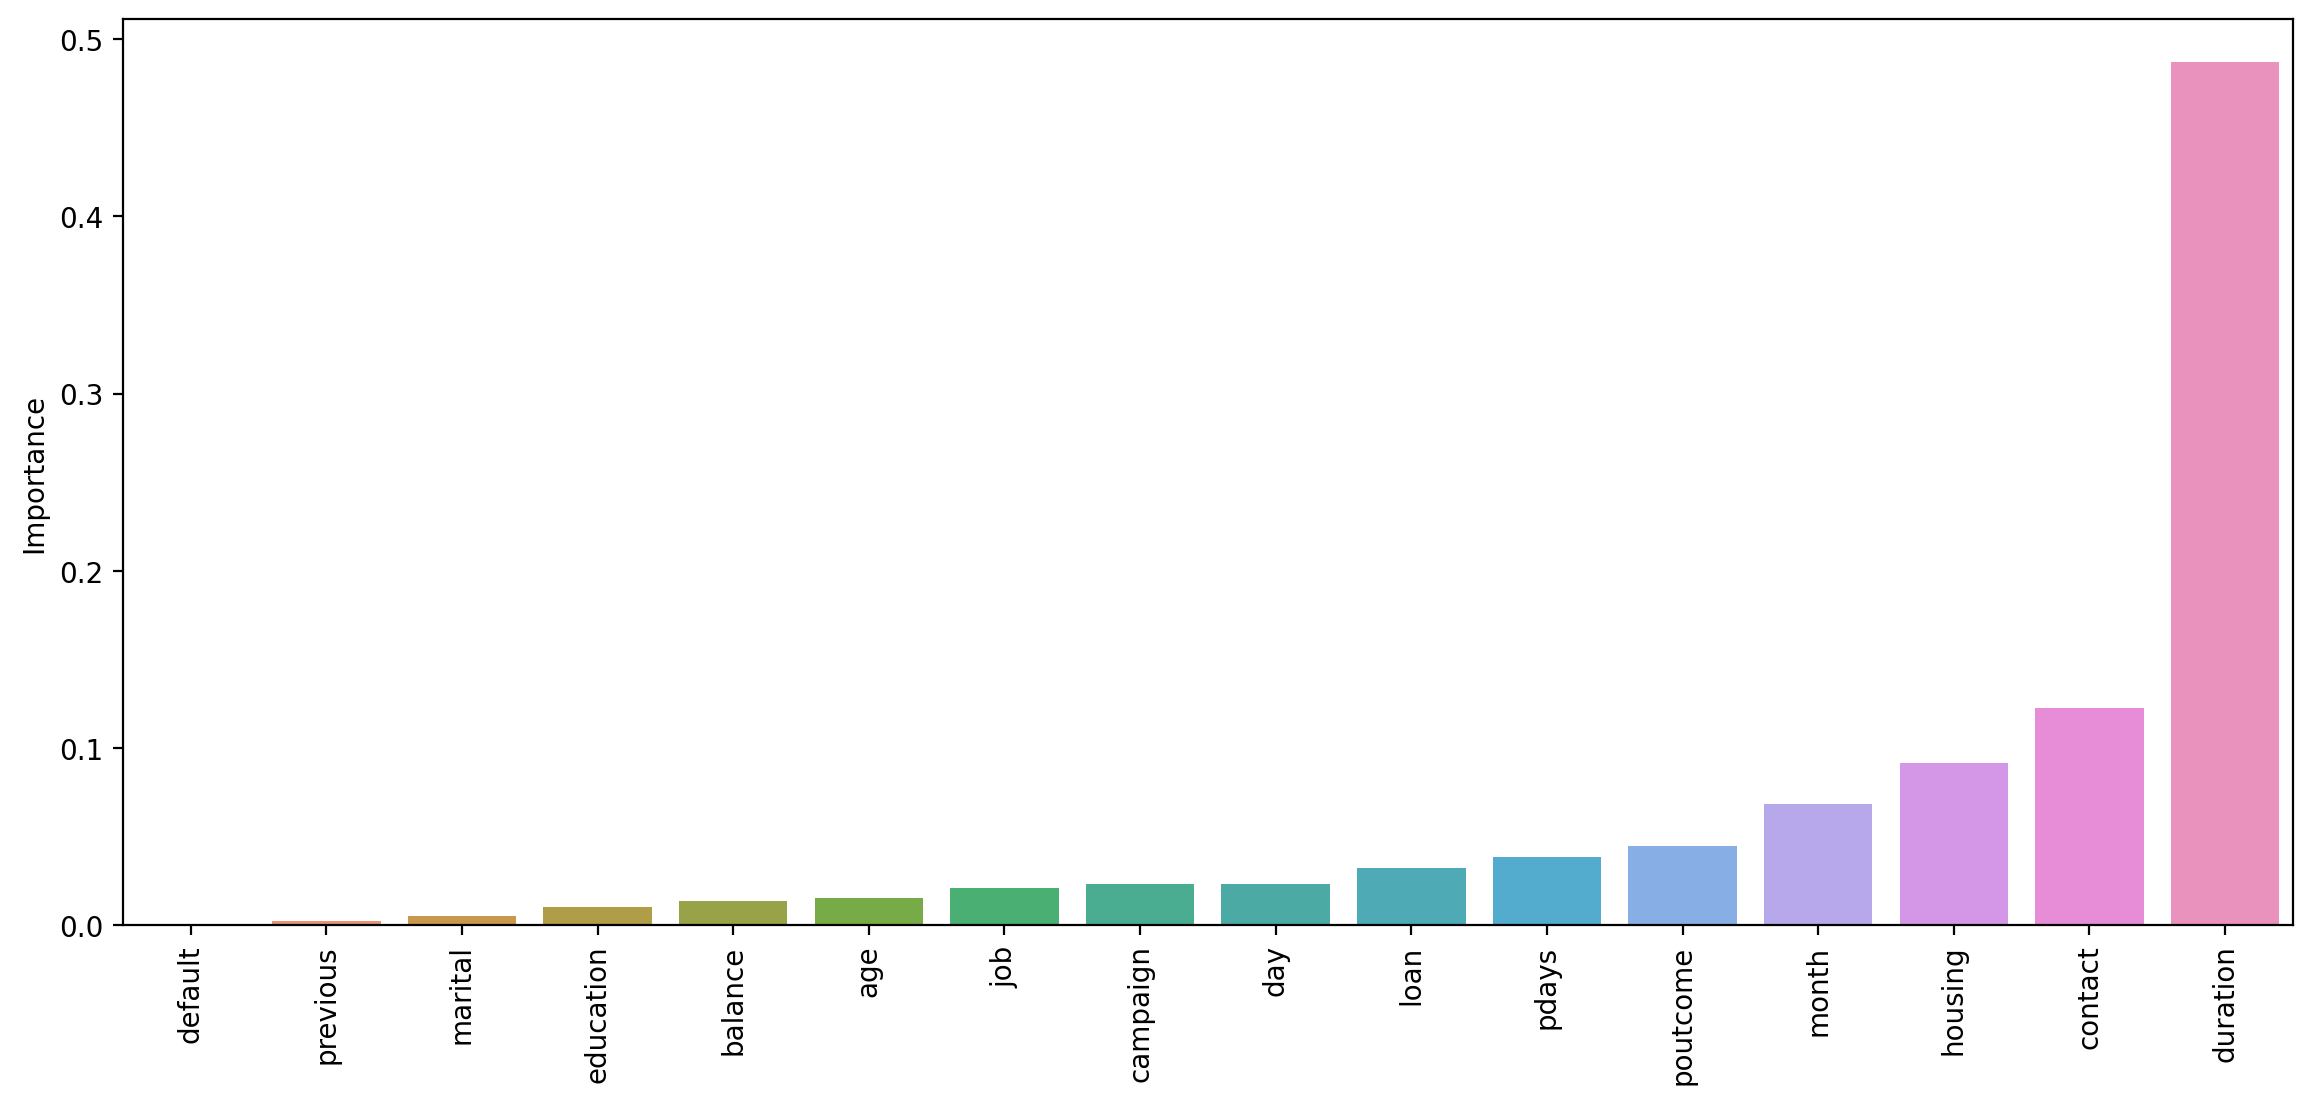

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_gb_feats.sort_values('Importance'),x=imp_gb_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)

In [ ]:
grad_samp_score = grad_samp_model.score(X_test_o,y_test_o)
print(f"Gradient Boosting Sampled Score : {grad_samp_score}")

Gradient Boosting Sampled Score : 0.9156859448554135


In [ ]:
from sklearn.metrics import roc_auc_score
print(f'roc_auc_score: {roc_auc_score(y_test_o,grad_samp_preds)}')

roc_auc_score: 0.915422672477268


The above GradientBoost Classifier with resampled data gave 91% accuracy

XGBOOST Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = {'learning_rate':[0.15, 0.20, 0.25],
             'max_depth':[3,5,9,10],
             'min_child_weight':[1, 3, 5],
             'gamma':[ 0.1, 0.2 , 0.3],
             'colsample_bytree':[ 0.4, 0.5]}

In [ ]:
xg_samp_model = XGBClassifier()
grid_xg_sm = GridSearchCV(xg_samp_model,param_grid)
grid_xg_sm.fit(X_train_o,y_train_o)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.4, 0.5],
                         'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.15, 0.2, 0.25],
                         'max_depth': [3, 5, 9, 10],
                         'min_child_weight': [1, 3, 5]})

In [ ]:
grid_xg_sm.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.25,
 'max_depth': 10,
 'min_child_weight': 1}

In [ ]:
xg_samp_model = XGBClassifier(colsample_bytree = 0.5,gamma = 0.2,learning_rate = 0.25,max_depth = 10,min_child_weight = 1)
xg_samp_model.fit(X_train_o,y_train_o)

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10)

In [ ]:
xg_samp_preds = grid_xg_sm.predict(X_test_o)

In [ ]:
print(classification_report(y_test_o,xg_samp_preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11717
           1       0.92      0.94      0.93     12075

    accuracy                           0.93     23792
   macro avg       0.93      0.93      0.93     23792
weighted avg       0.93      0.93      0.93     23792



In [ ]:
xg = pd.DataFrame(confusion_matrix(y_test_o, xg_samp_preds))
xg['Total'] = np.sum(xg, axis=1)
xg = xg.append(np.sum(xg, axis=0), ignore_index=True)
xg.columns = ['Predicted No', 'Predicted Yes', 'Total']
xg = xg.set_index([['Actual No', 'Actual Yes', 'Total']])
print(xg)

            Predicted No  Predicted Yes  Total
Actual No          10776            941  11717
Actual Yes           750          11325  12075
Total              11526          12266  23792


In [ ]:
feat_imp_xg = xg_samp_model.feature_importances_
imp_xg_feats = pd.DataFrame(index = X.columns,data=feat_imp_gb,columns=['Importance'])
imp_xg_feats

,Importance
age,0.015582
job,0.020835
marital,0.005055
education,0.010083
default,0.000402
balance,0.013495
housing,0.091542
loan,0.032606
contact,0.122750
day,0.023474


In [ ]:
imp_xg_feats.sort_values('Importance')

,Importance
default,0.000402
previous,0.002515
marital,0.005055
education,0.010083
balance,0.013495
age,0.015582
job,0.020835
campaign,0.023226
day,0.023474
loan,0.032606


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

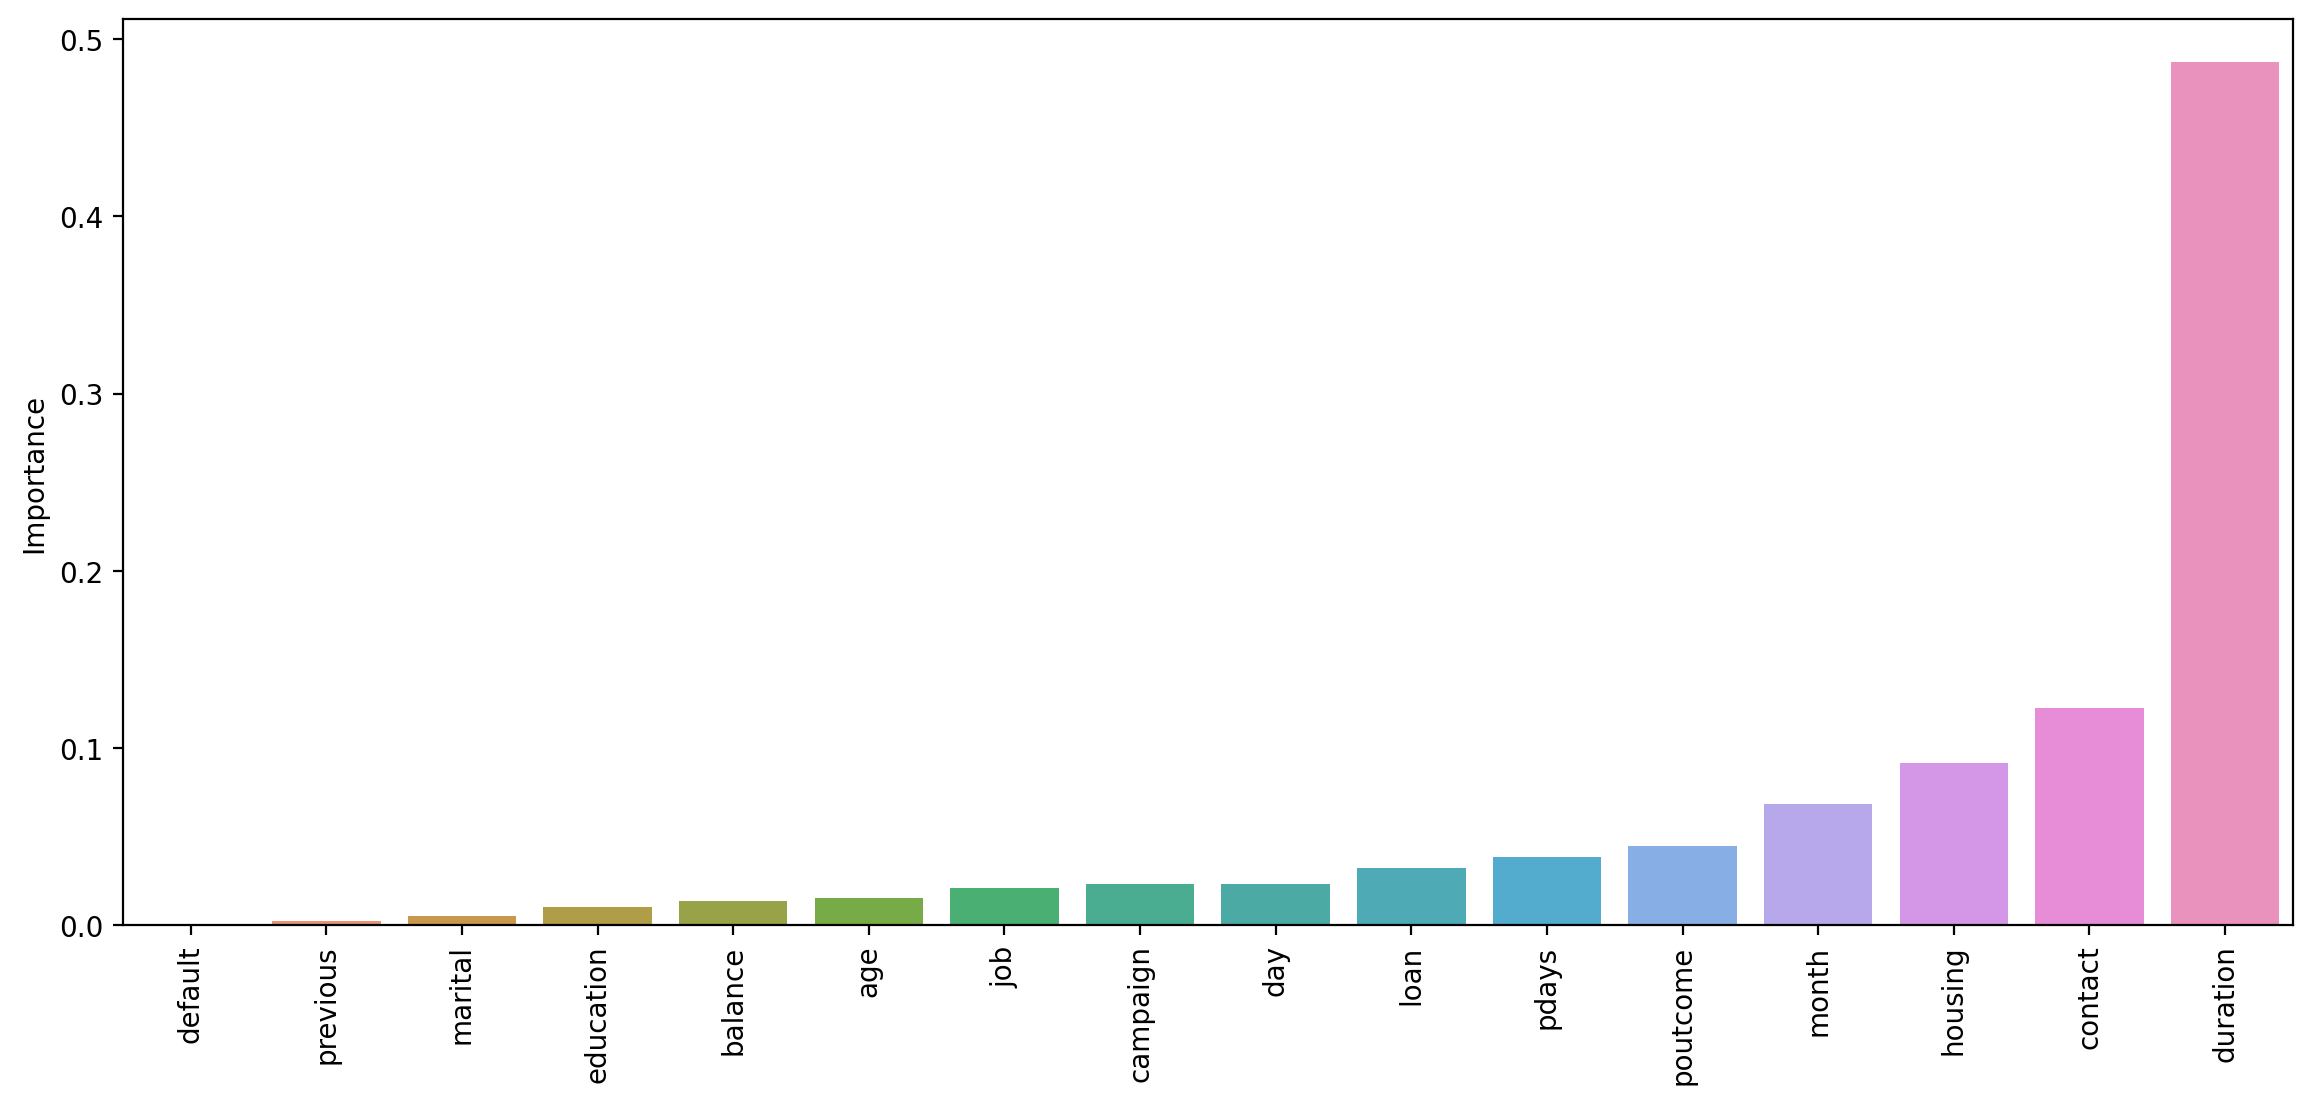

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_xg_feats.sort_values('Importance'),x=imp_xg_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)

In [ ]:
xg_accuracy = xg_samp_model.score(X_test_o,y_test_o)
print(f"xg_accuracy = {xg_accuracy}")

xg_accuracy = 0.9309431741761937


Here XGBoost Classifier with resampled data gave 93% accuracy.

Considering all the classification models created XGboost Classifier gave more accuracy with and without resampled data.

We can use XGBoost Classifier for this problem, which is giving stable and better accuracy.